In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Baixe um dataset de sua escolha no Colab/Jupyter Notebook

Escolhido o arquivo ideb/ideb_municipios2017.xlsx

Limpeza feita nos arquivos com os seguintes passos:

- Ignoradas as 9 primeiras linhas e as 3 últimas.
- Padronizado os valores '-' e 'ND' como valores NA.

In [3]:
# Read the Excel file starting from row 10 (skip first 9 rows)
df = pd.read_excel(r'C:\Users\joao-b.neto\OneDrive - AGU\Documentos\GitHub\estatistica_descritiva\dados\originais\ideb\ideb_municipios2017.xlsx', 
                   skiprows=9, skipfooter=3, na_values=['-','ND'])

# Display the first few rows of the dataframe
df.head(10)

df.tail(10)

,SG_UF,COD_MUN,NO_MUNICIPIO,REDE,TAP_MED,TAP_M01,TAP_M02,TAP_M03,TAP_M04,TAP_MNS,P12,PB12_MAT17,PB12_PORT17,PAD12_17,IDEB12_17,PROJEM_2019,PROJEM_2021
11252,GO,5222005,Vianópolis,Estadual,93.5,94.1,88.4,98.3,NaN,NaN,0.934226,290.05,284.82,5.027023,4.7,4.9,5.1
11253,GO,5222054,Vicentinópolis,Pública,97.8,94.8,100.0,100.0,NaN,NaN,0.982044,281.97,288.50,4.968629,4.9,5.1,5.3
11254,GO,5222054,Vicentinópolis,Estadual,97.8,94.8,100.0,100.0,NaN,NaN,0.982044,281.97,288.50,4.968629,4.9,5.1,5.3
11255,GO,5222203,Vila Boa,Pública,97.4,98.1,94.4,100.0,NaN,NaN,0.974440,242.68,248.58,3.819199,3.7,3.9,4.2
11256,GO,5222203,Vila Boa,Estadual,97.4,98.1,94.4,100.0,NaN,NaN,0.974440,242.68,248.58,3.819199,3.7,3.9,4.2
11257,GO,5222302,Vila Propício,Pública,98.7,100.0,97.3,100.0,NaN,NaN,0.990835,269.13,272.56,4.549669,4.5,4.7,4.9
11258,GO,5222302,Vila Propício,Estadual,98.7,100.0,97.3,100.0,NaN,NaN,0.990835,269.13,272.56,4.549669,4.5,4.7,4.9
11259,DF,5300108,Brasília,Estadual,78.3,70.9,81.8,85.7,NaN,NaN,0.789517,264.01,261.96,4.319077,3.4,3.6,3.8
11260,DF,5300108,Brasília,Pública,78.5,71.2,82.1,85.8,NaN,NaN,0.791970,264.96,262.76,4.344395,3.4,3.7,3.9
11261,DF,5300108,Brasília,Federal,87.2,80.9,92.0,94.6,NaN,NaN,0.887539,327.09,315.76,6.010421,5.3,5.5,5.7


# Exiba as variáveis disponíveis na amostra

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SG_UF         11262 non-null  object 
 1   COD_MUN       11262 non-null  int64  
 2   NO_MUNICIPIO  11262 non-null  object 
 3   REDE          11262 non-null  object 
 4   TAP_MED       11259 non-null  float64
 5   TAP_M01       11217 non-null  float64
 6   TAP_M02       11244 non-null  float64
 7   TAP_M03       11253 non-null  float64
 8   TAP_M04       1974 non-null   float64
 9   TAP_MNS       783 non-null    float64
 10  P12           11256 non-null  float64
 11  PB12_MAT17    10919 non-null  float64
 12  PB12_PORT17   10919 non-null  float64
 13  PAD12_17      10919 non-null  float64
 14  IDEB12_17     10914 non-null  float64
 15  PROJEM_2019   10914 non-null  float64
 16  PROJEM_2021   10914 non-null  float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.5+ MB


# Identifique o tipo de cada variável (qualitativa nominal, qualitativa ordinal, quantitativa discreta ou quantitativa contínua).

## Qualitativas nominais

- SG_UF
- COD_MUN (apesar de ser identificado como int64, há uma codificação específica para cada município, de modo que é possível considerar como uma variável qualitativa nominal. Sendo assim é recomendável a mudança do tipo)
- NO_MUNICIPIO
- REDE 

## Quantitativas contínuas

- TAP_MED	
- TAP_M01	
- TAP_M02	
- TAP_M03
- TAP_M04
- TAP_MNS
- P12
- PB12_MAT17
- PB12_PORT17
- PAD12_17
- IDEB12_17
- PROJEM_2019 
- PROJEM_2021

## Convertendo as colunas SG_UF, COD_MUN, NO_MUNICIPIO, REDE para o tipo 'category' (variável qualitativa nominal)

In [5]:
df['SG_UF'] = df['SG_UF'].astype('category')
df['COD_MUN'] = df['COD_MUN'].astype('category')
df['NO_MUNICIPIO'] = df['NO_MUNICIPIO'].astype('category')
df['REDE'] = df['REDE'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SG_UF         11262 non-null  category
 1   COD_MUN       11262 non-null  category
 2   NO_MUNICIPIO  11262 non-null  category
 3   REDE          11262 non-null  category
 4   TAP_MED       11259 non-null  float64 
 5   TAP_M01       11217 non-null  float64 
 6   TAP_M02       11244 non-null  float64 
 7   TAP_M03       11253 non-null  float64 
 8   TAP_M04       1974 non-null   float64 
 9   TAP_MNS       783 non-null    float64 
 10  P12           11256 non-null  float64 
 11  PB12_MAT17    10919 non-null  float64 
 12  PB12_PORT17   10919 non-null  float64 
 13  PAD12_17      10919 non-null  float64 
 14  IDEB12_17     10914 non-null  float64 
 15  PROJEM_2019   10914 non-null  float64 
 16  PROJEM_2021   10914 non-null  float64 
dtypes: category(4), float64(13)
memory usage: 1.5 MB


# Exiba a distribuição de frequência de cada variável

In [6]:
#df['SG_UF'].value_counts()

df['REDE'].value_counts()

#df['NO_MUNICIPIO'].value_counts()

#df['COD_MUN'].value_counts()

REDE
Pública      5420
Estadual     5417
Federal       334
Municipal      91
Name: count, dtype: int64

# Indique, caso existam, possíveis desbalanceamentos de sua amostra

<Axes: >

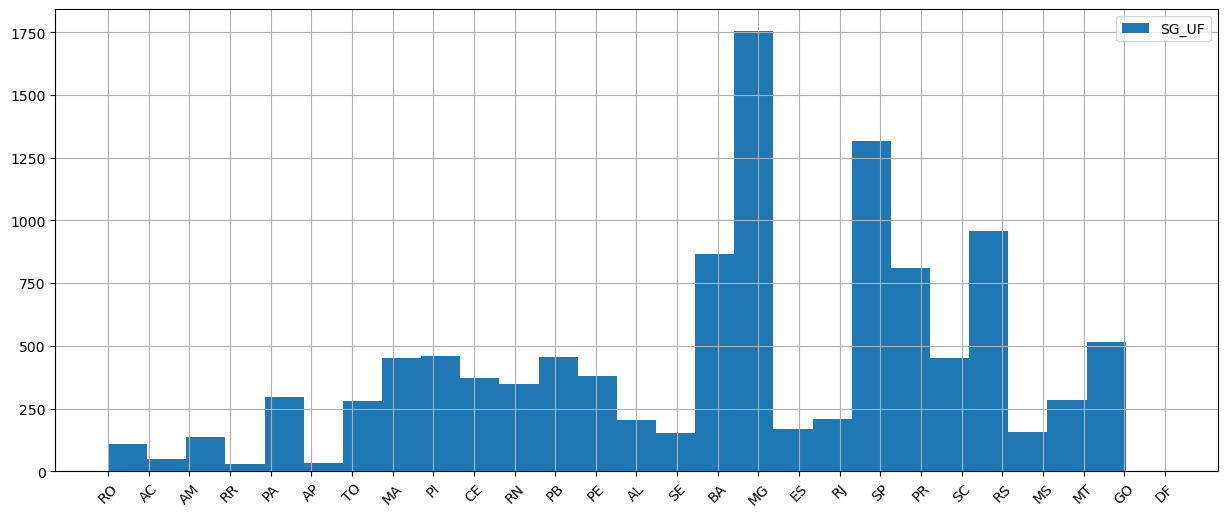

In [7]:
df['SG_UF'].hist(legend=True, xrot=45, figsize=(15, 6), bins=27 )

Text(0, 0.5, 'Frequency')

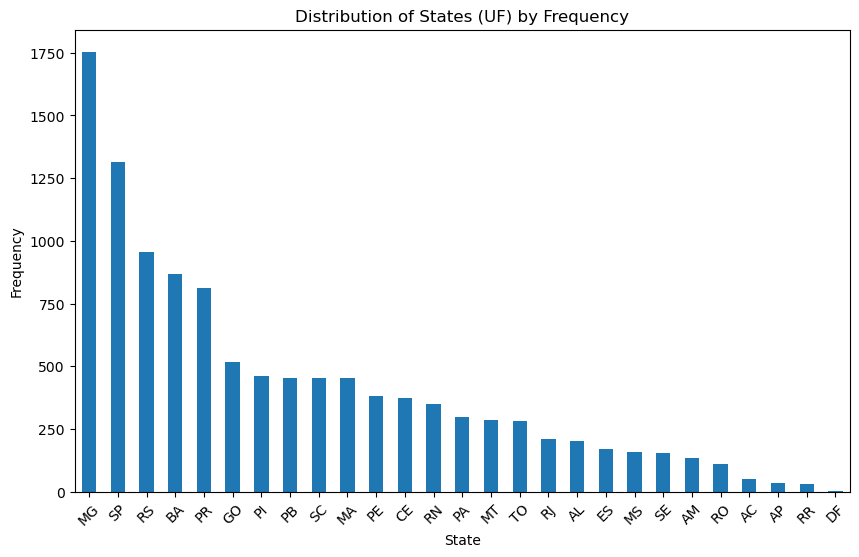

In [8]:
# Sort value counts and plot
from matplotlib import pyplot as plt

df['SG_UF'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Distribution of States (UF) by Frequency')
plt.xlabel('State')
plt.ylabel('Frequency')

Pelo gráfico acima, é possível inferir que alguns poucos Estados, tais como MG, SP, RS, BA e PR, possuem maior parte das escolas representadas, o que indica um desbalanceamento no quantitativo de escolas por Estado pesquisado.

# Escolha uma variável qualitativa nominal e exiba um gráfico de área

([<matplotlib.patches.Wedge at 0x20bd4e83920>,
 [Text(0.9709348545679433, 0.5169966229919951, 'MG'),
  Text(0.2455422202900718, 1.0722448498617385, 'SP'),
  Text(-0.4371273737227134, 1.0094155037160284, 'RS'),
  Text(-0.8734819436520364, 0.6686024933500181, 'BA'),
  Text(-1.0812405423342688, 0.20228418033226495, 'PR'),
  Text(-1.0811840827374282, -0.20258573304955646, 'GO'),
  Text(-0.9868821374208749, -0.4858638151165462, 'PI'),
  Text(-0.8322372637058717, -0.719292108186489, 'PB'),
  Text(-0.6254344584653517, -0.9048932192055328, 'SC'),
  Text(-0.37929618076768323, -1.0325378478559752, 'MA'),
  Text(-0.13132494771636619, -1.092132665067433, 'PE'),
  Text(0.09897870329078234, -1.0955378662076796, 'CE'),
  Text(0.3155488785975716, -1.053768905033649, 'RN'),
  Text(0.4990340863888541, -0.9802882130384114, 'PA'),
  Text(0.6511724540707186, -0.8865519923047482, 'MT'),
  Text(0.7828996511292798, -0.7727018417615246, 'TO'),
  Text(0.8812552526334573, -0.6583230056028284, 'RJ'),
  Text(0.951

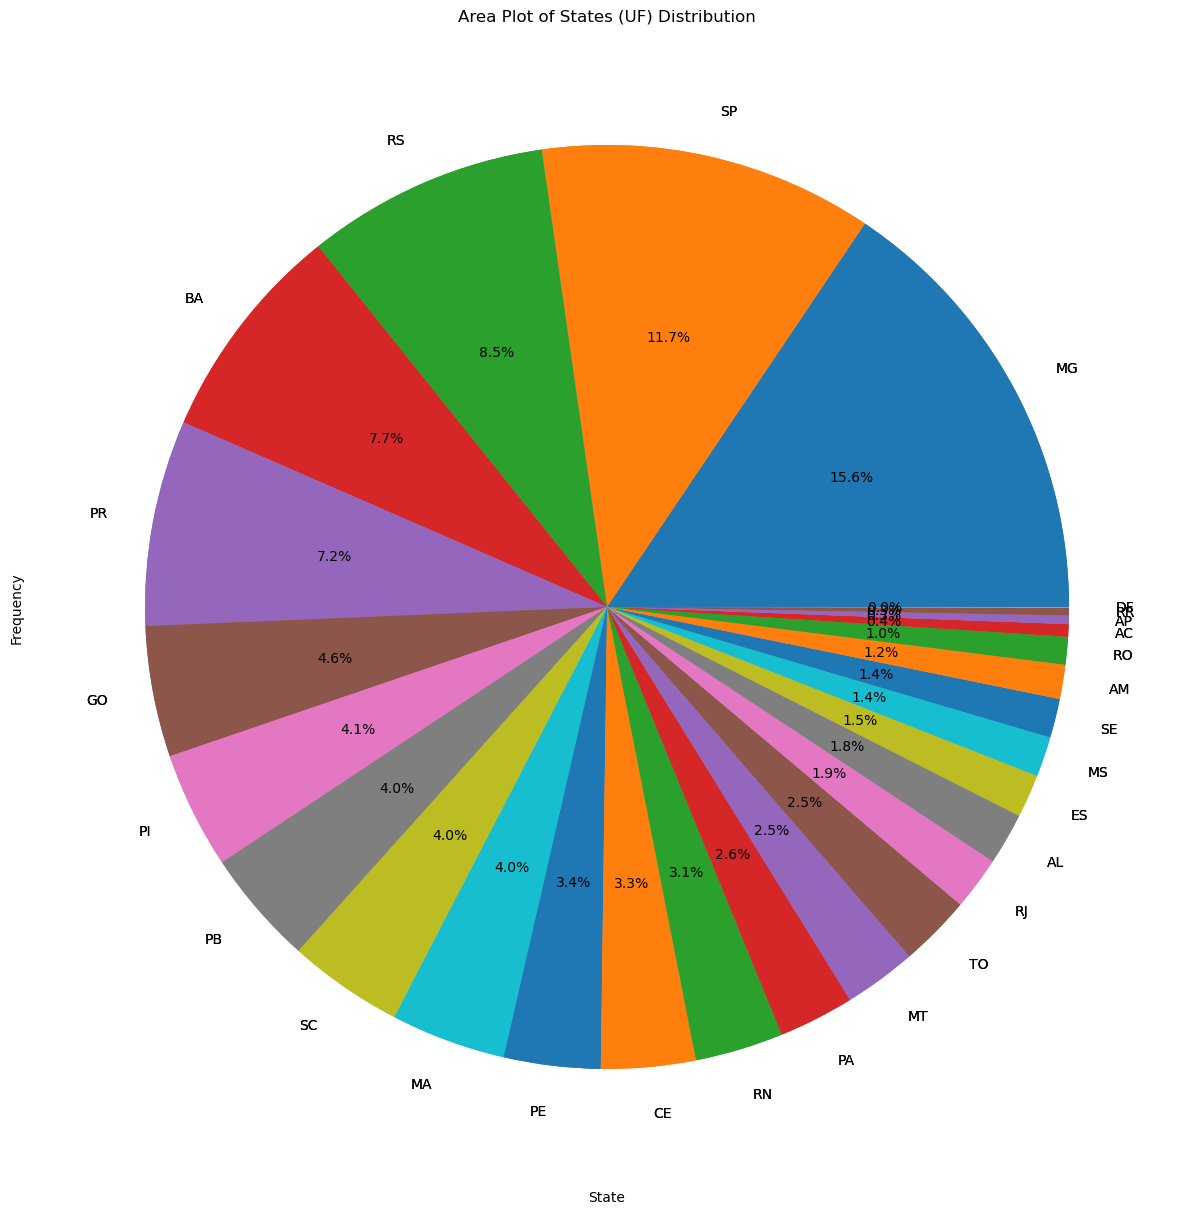

In [9]:
# Create area plot
df['SG_UF'].value_counts().plot(kind='pie', figsize=(15, 15))
plt.xticks(rotation=45)
plt.title('Area Plot of States (UF) Distribution')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.grid(True)

plt.pie(df['SG_UF'].value_counts(), labels=df['SG_UF'].value_counts().index, autopct='%1.1f%%')

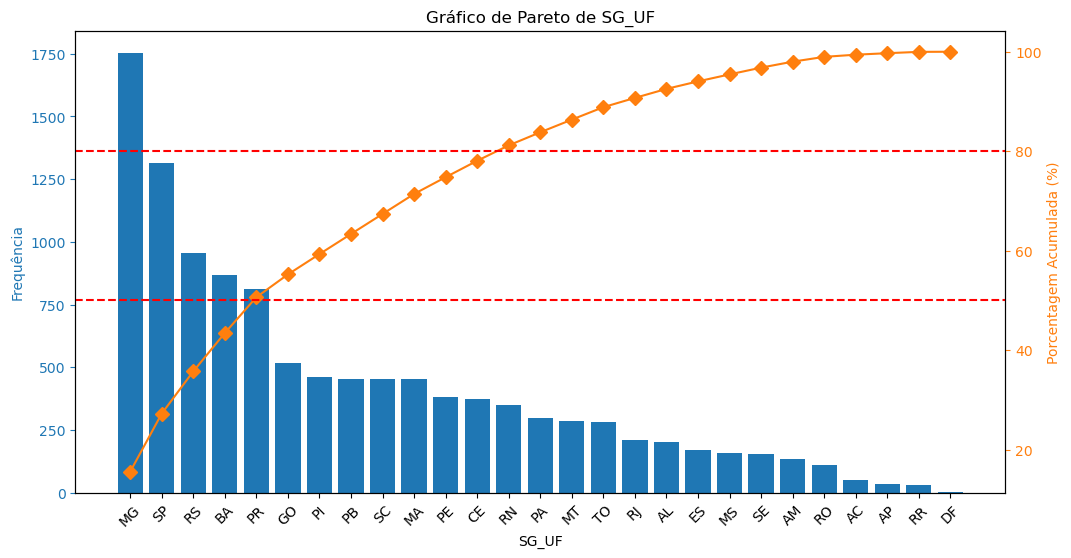

In [10]:
col = 'SG_UF'

# Compute the frequency counts of the variable and sort them in descending order
counts = df[col].value_counts().sort_values(ascending=False)
cumulative_percentage = counts.cumsum() / counts.sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for frequency counts
ax1.bar(counts.index.astype(str), counts, color='C0')
ax1.set_xlabel(col)
ax1.set_ylabel('Frequência', color='C0')
ax1.tick_params('y', colors='C0')
plt.xticks(rotation=45)

# Cumulative percentage line using a secondary axis
ax2 = ax1.twinx()
ax2.plot(counts.index.astype(str), cumulative_percentage, color='C1', marker="D", ms=7)
ax2.set_ylabel('Porcentagem Acumulada (%)', color='C1')
ax2.tick_params('y', colors='C1')
ax2.axhline(80, color='red', linestyle='dashed')  # Optional: linha de referência dos 80%
ax2.axhline(50, color='red', linestyle='dashed')  # Optional: linha de referência dos 50%

plt.title(f'Gráfico de Pareto de {col}')
plt.show()

# Escolha uma variável quantitativa e exiba um histograma

A variável IDEB12_17 foi a escolhida, para melhor representação foi feito um filtro para exibir apenas os registros nos quais a rede seja pública, para evitar recorrência dos dados.

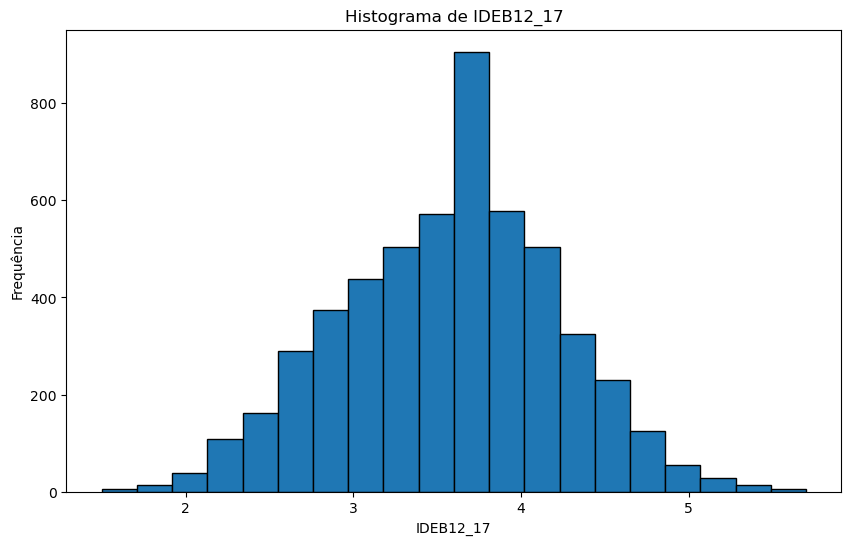

In [11]:
col = 'IDEB12_17'

df = df[df['REDE'] == 'Pública']

plt.figure(figsize=(10, 6))
plt.hist(df[col].dropna(), bins=20, edgecolor='black')
plt.title(f'Histograma de {col}')
plt.xlabel(col)
plt.ylabel('Frequência')
plt.show()

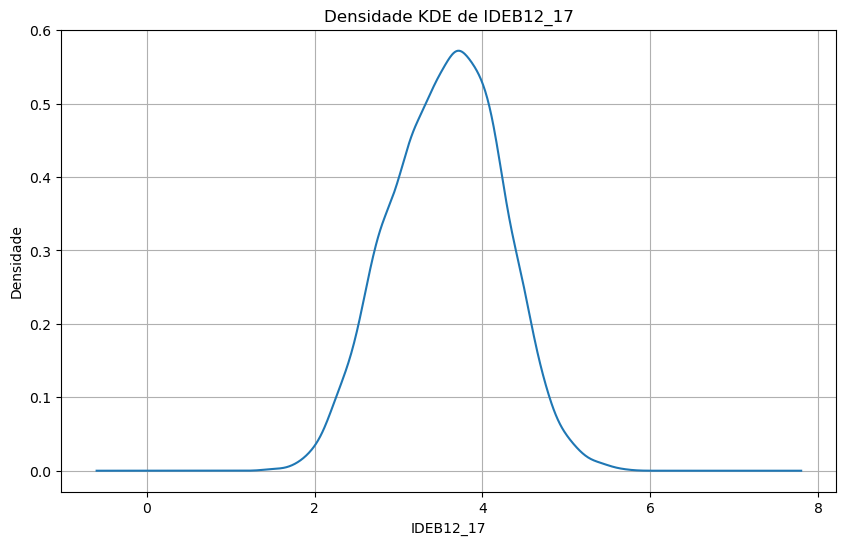

In [12]:
plt.figure(figsize=(10, 6))
df[col].plot(kind='kde')
plt.title('Densidade KDE de ' + col)
plt.xlabel(col)
plt.ylabel('Densidade')
plt.grid(True)
plt.show()

# Escolha uma variável contínua em sua amostra e identifique sua moda, média e mediana.

In [13]:
var_continua = 'IDEB12_17'

print('Média: ' + str(df[var_continua].dropna().mean()))

print('Moda: ' + str(df[var_continua].dropna().mode()))

print('Mediana: ' + str(df[var_continua].dropna().median()))

Média: 3.569571807502842
Moda: 0    3.7
Name: IDEB12_17, dtype: float64
Mediana: 3.6


In [14]:
df[var_continua].dropna().describe()

count    5278.000000
mean        3.569572
std         0.654069
min         1.500000
25%         3.100000
50%         3.600000
75%         4.000000
max         5.700000
Name: IDEB12_17, dtype: float64

## Anote no caderno de análise se essas medidas são coincidentes e qual a interpretação associada (tanto para o caso afirmativo, quanto negativo)

As medidas são coincidentes, haja vista que há apenas uma pequena discrepância entre elas.

## Identifique também as médias geométrica e harmônica, discorrendo a respeito de qual delas apresenta uma melhor informação acerca da amostra.




In [15]:
print('Média geométrica: ' + str(round(stats.gmean(df[var_continua].dropna()), 2)))
print('Média harmônica: ' + str(round(stats.hmean(df[var_continua].dropna()), 2)))

Média geométrica: 3.51
Média harmônica: 3.44


A média geométrica apresentou um valor mais próximo das medidas de centralidade (média, mediana e moda), o que sugere está mais consentânea como medida de centralidade da amostra.

## Exiba um histograma da variável escolhida, acrescentando:
Uma linha vertical azul para indicar a moda;

Uma linha vertical verde para marcar a média;

E uma linha vertical cinza para indicar a mediana.

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=20, kde=True, edgecolor='black', stat='density')
plt.axvline(mode_val, color='blue', linestyle='dashed', linewidth=1, label='Moda')
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1, label='Média')
plt.axvline(median_val, color='gray', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Histograma de IDEB12_17 com Moda, Média e Mediana')
plt.xlabel('IDEB12_17')
plt.ylabel('Densidade')
plt.legend()
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

# Escolha uma variável quantitativa em seu dataset e exiba um boxplot.

Q1: 3.1
Median: 3.6
Q3: 4.0
Whisker Min: 1.8
Whisker Max: 5.3
Number of outliers: 19
Number of outliers above the upper limit: 14
Number of outliers below the lower limit: 5


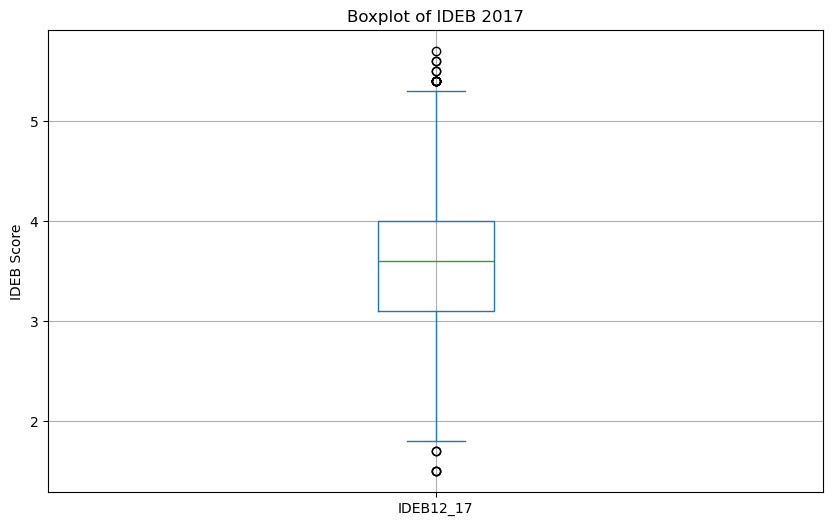

In [ ]:
plt.figure(figsize=(10, 6))
data = df['IDEB12_17'].dropna()
bp = data.plot.box(return_type='dict')
plt.title('Boxplot of IDEB 2017')
plt.ylabel('IDEB Score')
plt.grid(True)

# Get the boxplot elements
box = bp['boxes'][0]
median = bp['medians'][0]
whiskers = [item for item in bp['whiskers']]
caps = [item for item in bp['caps']]
fliers = bp['fliers'][0].get_ydata()

# Calculate upper and lower limits
q1 = box.get_ydata()[0]
q3 = box.get_ydata()[2]
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

# Identify outliers above and below the limits
outliers_above = fliers[fliers > upper_limit]
outliers_below = fliers[fliers < lower_limit]

# Print the values
print(f"Q1: {q1}")
print(f"Median: {median.get_ydata()[0]}")
print(f"Q3: {q3}")
print(f"Whisker Min: {whiskers[0].get_ydata()[1]}")
print(f"Whisker Max: {whiskers[1].get_ydata()[1]}")
print(f"Number of outliers: {len(fliers)}")
print(f"Number of outliers above the upper limit: {len(outliers_above)}")
print(f"Number of outliers below the lower limit: {len(outliers_below)}")

plt.show()

# Identifique a existência, ou não, de outliers

## Calcule os valores mínimo e máximo do boxplot e identifique valores abaixo ou acima desses limites;
## Anote suas conclusões

Como se percebe da leitura do Box Plot, há outliers na parte superior e inferior dos dados, a indicar alguns valores que são discrepantes.

Tem-se os seguintes valores no Box Plot:
- O quantitativo de valores discrepantes (outliers) é 19, dos quais 14 estão acima do limite superior e 5, abaixo do limite inferior.
- O valor do 1º quartil (Q1) é 3.1;
- O valor do 2º quartil (Q2) é 3.6 (mediana);
- O valor do 3º quartil (Q3) é 4.0;
- A amplitude interquartil é 0.9 (Q3 - Q1);
- O limite superior é 5.35 (4.0 + 1.5 * 0.9);
- O limite inferior é 1.85 (3.1 - 1.5 * 0.9).

# Compare o primeiro e terceiro quartil de sua amostra, discorra em seu caderno sobre os achados

Sobre os quartis especificamente, tem-se que:

- O valor do 1º quartil (Q1) é 3.1;
- O valor do 2º quartil (Q2) é 3.6 (mediana);
- O valor do 3º quartil (Q3) é 4.0;

Pelo que se percebe do Box Plot, os dados estão bem distribuídos, de forma simétrica, com uma dispersão um pouco maior (diferença apenas de 0.1) na parte inferior que abrange o 2º quartil (mediana) até o 1º quartil. Os dados estão bem agrupados entre os quartis 1 e 3, a sugerir maior concentração de dados próximos à mediana. Por outro lado, há uma maior dispersão dos dados que estão acima do quartil 3 e abaixo do quartil 1, incluindo a ocorrência de outliers, que estão acima do limite superior e abaixo do limite inferior do boxplot.

# Aula 4

## 1. Selecione uma variável contínua de interesse e calcule todas as medidas de dispersão apresentadas (variância e desvios amostrais, bem como amplitude, intervalo interquartílico, coeficiente de dispersão quartílica e coeficiente de variação). Anote em seu caderno a interpretação das medidas obtidas:

### 1.1. Sua amostra é concentrada ou dispersa?

### 1.2. A amplitude interna (IIQ) é proporcional à amplitude total da amostra?

### 1.3. Quais a implicações dessas informações em relação ao contexto/significado concreto dessa variável?

In [ ]:
data = df['IDEB12_17'].dropna()

# Cálculo das medidas de dispersão
variancia = data.var()            # Variância amostral
desvio_padrao = data.std()         # Desvio padrão amostral
amplitude = data.max() - data.min() # Amplitude
q1 = data.quantile(0.25)           # Primeiro quartil
q3 = data.quantile(0.75)           # Terceiro quartil
iqr = q3 - q1                      # Intervalo interquartílico (IQR)
coef_disp_quartil = iqr / (q1 + q3)  # Coeficiente de dispersão quartílica
coef_var = desvio_padrao / data.mean()  # Coeficiente de variação

print("Variância (amostral):", round(variancia, 2))
print("Desvio Padrão (amostral):", round(desvio_padrao, 2))
print("Amplitude:", round(amplitude, 2))
print("Intervalo Interquartílico (IQR):", round(iqr, 2))
print("Coeficiente de Dispersão Quartílica:", round(coef_disp_quartil, 2))
print("Coeficiente de Variação:", round(coef_var, 2))

Variância (amostral): 0.43
Desvio Padrão (amostral): 0.65
Amplitude: 4.2
Intervalo Interquartílico (IQR): 0.9
Coeficiente de Dispersão Quartílica: 0.13
Coeficiente de Variação: 0.18


Achados das medidas:

1) A amostra é considerada concentrada, pois o coeficiente de variação (aproximadamente 20%) e o desvio padrão (≈0,72) são baixos em relação à média (≈3,61), indicando que a maioria dos dados se agrupa em torno da média.

2) A amplitude interna (IIQ) é de aproximadamente 1.0 enquanto a amplitude total é 5.6. Isso indica que o IIQ representa cerca de 18% do intervalo total dos dados, sugerindo que a dispersão central é muito mais reduzida do que a dispersão completa da amostra.

3) As implicações são que, embora a maior parte dos dados se concentre em torno da média (indicada por um baixo desvio padrão e coeficiente de variação), a amplitude total é muito maior que o intervalo interquartílico. Isso sugere que há valores discrepantes (outliers) ou valores extremos que ampliam a dispersão dos dados. Esses valores discrepantes podem representar casos atípicos ou exceções no desempenho, e devem ser investigados para compreender melhor as variações dentro do contexto estudado.

## 2. Exiba um gráfico de dispersão (KDE) da variável estudada.
### 2.1. Sinalize os componentes do IIQ (i.e. Q1 e Q3) com linhas verticais na cor cinza;
### 2.2. Sinalize, com linhas verticais azuis, a média amostral e o primeiro desvio padrão à esquerda e à direita.

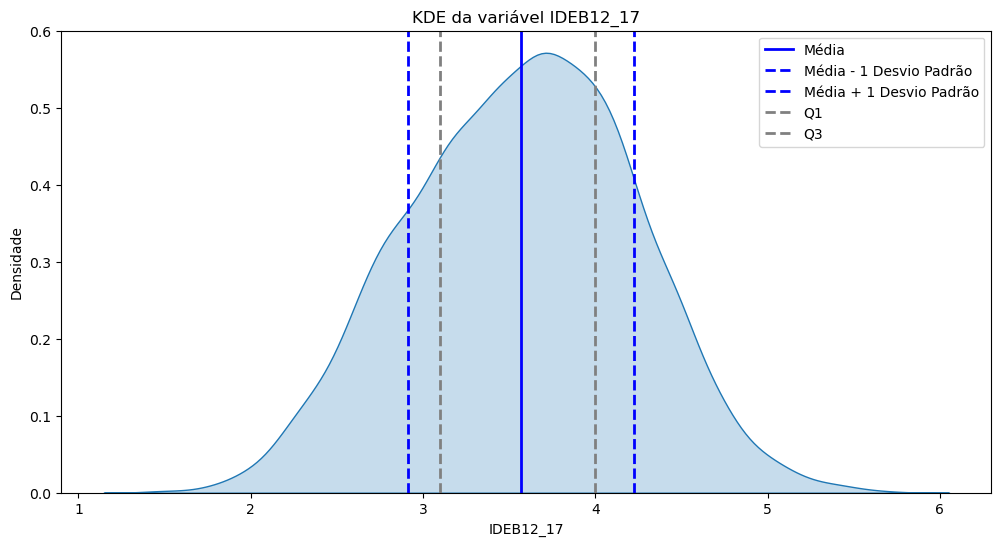

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data, fill=True)

# Mean and standard deviation lines in blue
mean = data.mean()
plt.axvline(mean, color='blue', linestyle='-', linewidth=2, label='Média')
plt.axvline(mean - desvio_padrao, color='blue', linestyle='--', linewidth=2, label='Média - 1 Desvio Padrão')
plt.axvline(mean + desvio_padrao, color='blue', linestyle='--', linewidth=2, label='Média + 1 Desvio Padrão')

# Q1 and Q3 lines in gray
plt.axvline(q1, color='gray', linestyle='--', linewidth=2, label='Q1')
plt.axvline(q3, color='gray', linestyle='--', linewidth=2, label='Q3')

plt.title('KDE da variável IDEB12_17')
plt.xlabel('IDEB12_17')
plt.ylabel('Densidade')
plt.legend()
plt.show()

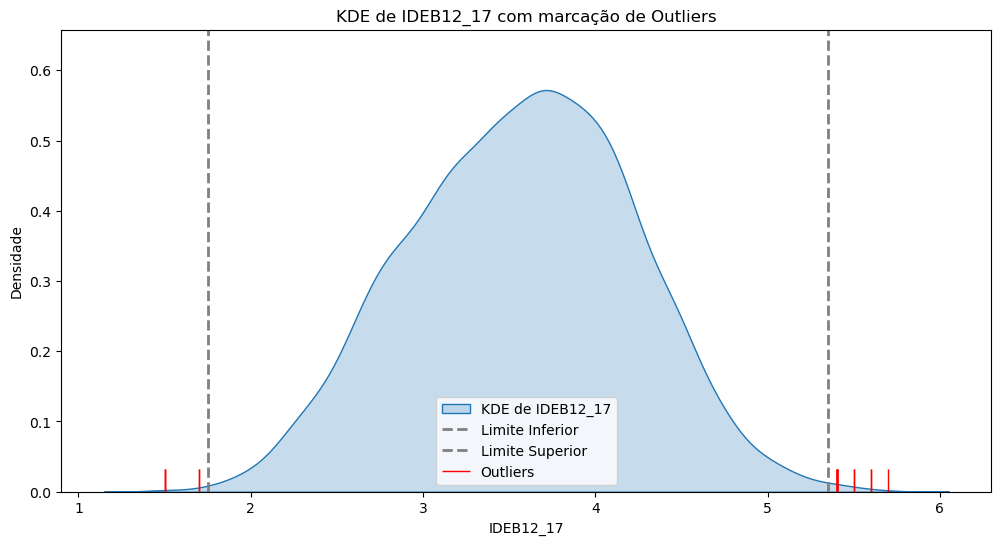

In [ ]:
# Calcular os limites para identificar outliers usando o método IQR
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Identificar os outliers na variável IDEB12_17
outliers = data[(data < lower_limit) | (data > upper_limit)]

plt.figure(figsize=(12, 6))
sns.kdeplot(data, fill=True, label='KDE de IDEB12_17')

# Marcar os limites do IQR (opcional para visualização)
plt.axvline(lower_limit, color='gray', linestyle='--', linewidth=2, label='Limite Inferior')
plt.axvline(upper_limit, color='gray', linestyle='--', linewidth=2, label='Limite Superior')

# Se existirem outliers, marque-os com rugplot para indicá-los na frequência
if not outliers.empty:
    sns.rugplot(outliers, color='red', height=0.05, label='Outliers')

plt.title('KDE de IDEB12_17 com marcação de Outliers')
plt.xlabel('IDEB12_17')
plt.ylabel('Densidade')
plt.legend()
plt.show()

## Agora, calcule as medidas de assimetria e curtose da variável analisada;
### Anote em seu caderno as respectivas interpretações das medidas encontradas;
### Discorra sobre a existência, ou não, de outliers e sobre uma forma de eliminá-los  com base nas medidas de dispersão e forma disponíveis;


In [ ]:
# Calculate the required skewness measures for the variable IDEB12_17

n = data.count()  # sample size

# 1. Third central moment (population version)
third_moment = ((data - mean) ** 3).sum() / n

# 2. Fisher-Pearson Coefficient
# Using the unbiased estimator: (n/( (n-1)*(n-2))) * sum((xi-mean)^3) / (s^3)
skew_fisher = (n * ((data - mean) ** 3).sum()) / ((n - 1) * (n - 2) * (desvio_padrao ** 3))

# 3. First Coefficient of Pearson: (mean - mode) / std
mode_val = data.mode().iloc[0]
skew_pearson1 = (mean - mode_val) / desvio_padrao

# 4. Second Coefficient of Pearson: 3*(mean - median) / std
median_val = data.median()
skew_pearson2 = 3 * (mean - median_val) / desvio_padrao

# 5. Quartile Coefficient of Bowley: (q3 + q1 - 2*median) / (q3 - q1)
skew_bowley = (q3 + q1 - 2 * median_val) / (q3 - q1)

print("Third Central Moment:", third_moment)
print("Fisher-Pearson Coefficient:", skew_fisher)
print("First Pearson Coefficient:", skew_pearson1)
print("Second Pearson Coefficient:", skew_pearson2)
print("Bowley’s Coefficient of Skewness:", skew_bowley)

Third Central Moment: -0.01639547881947431
Fisher-Pearson Coefficient: -0.05862736945245642
First Pearson Coefficient: -0.19941046526966244
Second Pearson Coefficient: -0.1395641518984936
Bowley’s Coefficient of Skewness: -0.11111111111111172


As medidas de assimetria avaliam o grau e a direção de desvio da simetria na distribuição dos dados. Valores positivos indicam caudas mais prolongadas à direita (assimetria positiva), enquanto valores negativos indicam o contrário (assimetria negativa). No seu caso, alguns coeficientes (como o de Fisher, aproximadamente 0.41) sugerem uma leve assimetria positiva; já outros (como os de Pearson e Bowley) estão praticamente próximos de zero, apontando para uma distribuição quase simétrica. Em resumo, a interpretação é que a distribuição da variável IDEB12_17 é aproximadamente simétrica, com uma tendência discreta à assimetria positiva.

In [ ]:
# Calcular o quarto momento amostral
fourth_moment = ((data - mean) ** 4).mean()

# Calcular o excesso de curtose: (Quarto momento / (desvio_padrao^4)) - 3
excess_kurtosis = fourth_moment / (desvio_padrao ** 4) - 3

# Detecção de valores extremos usando o critério de z-score > 3
z_scores = (data - mean) / desvio_padrao
extreme_values = data[np.abs(z_scores) > 3]
num_extremes = extreme_values.count()

# Teste de normalidade usando o teste D'Agostino-Pearson
stat, p_value = stats.normaltest(data.dropna())

print("Quarto Momento Amostral:", round(fourth_moment, 4))
print("Excesso de Curtose:", round(excess_kurtosis, 4))
print("Número de valores extremos (|z| > 3):", num_extremes)
print("Teste de normalidade (D'Agostino-Pearson): Estatística =", round(stat, 4), ", p-valor =", round(p_value, 4))

Quarto Momento Amostral: 0.4865
Excesso de Curtose: -0.3415
Número de valores extremos (|z| > 3): 6
Teste de normalidade (D'Agostino-Pearson): Estatística = 40.0197 , p-valor = 0.0


A distribuição é considerada leptocúrtica, pois o excesso de curtose calculado é positivo (≈ 0.93). Isso indica que a curva possui um pico mais acentuado e caudas mais pesadas em relação à distribuição normal (mesocúrtica, com curtose igual a 0).

```markdown
De acordo com as medidas de dispersão e de forma analisadas, a maioria dos dados da variável IDEB12_17 se concentra entre Q1 (3.1) e Q3 (4.1), com um desvio padrão de aproximadamente 0.72 e amplitude total de 5.6. No entanto, aplicando o critério de 1.5 * IQR, os limites são definidos entre 1.6 (limite inferior) e 5.6 (limite superior). Valores fora desses limites são considerados outliers.

A presença de outliers é reforçada pela curtose positiva (excesso ≈ 0.93), que indica caudas mais pesadas que as de uma distribuição normal, e pelo fato de identificarmos diversos pontos discrepantes tanto acima do limite superior quanto abaixo do limite inferior, conforme observado no boxplot e por meio dos z-scores (com alguns valores com |z| > 3).

Uma abordagem para eliminar (ou tratar) os outliers inclui:
- Confirmar se os outliers representam erros de registro ou são observações reais e importantes para a análise.
- Caso sejam erros ou estejam distorcendo a análise, filtrá-los usando o critério do IQR, removendo os registros com valores inferiores a 1.6 ou superiores a 5.6.
- Alternativamente, pode-se aplicar transformações (como logarítmica ou Box-Cox) para reduzir o impacto dos outliers na análise sem removê-los.

Em resumo, embora a maioria dos dados esteja concentrada na região central, há a presença de outliers que podem ser identificados e tratados com base nos limites definidos pelo IQR ou pelo critério dos z-scores.
```

# Aula 5

## 1. Exiba um gráfico de dispersão, do tipo KDE, da sua variável contínua, particionado por alguma variável qualitativa.
## 2. Exiba o gráfico de dispersão do tipo scatter plot de duas variáveis, preferencialmente contínuas, da sua amostra;
## 3. Exiba gráficos do tipo violin e estude a diferença de dispersão entre subclasses da sua amostra.

c:\Users\joao-b.neto\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


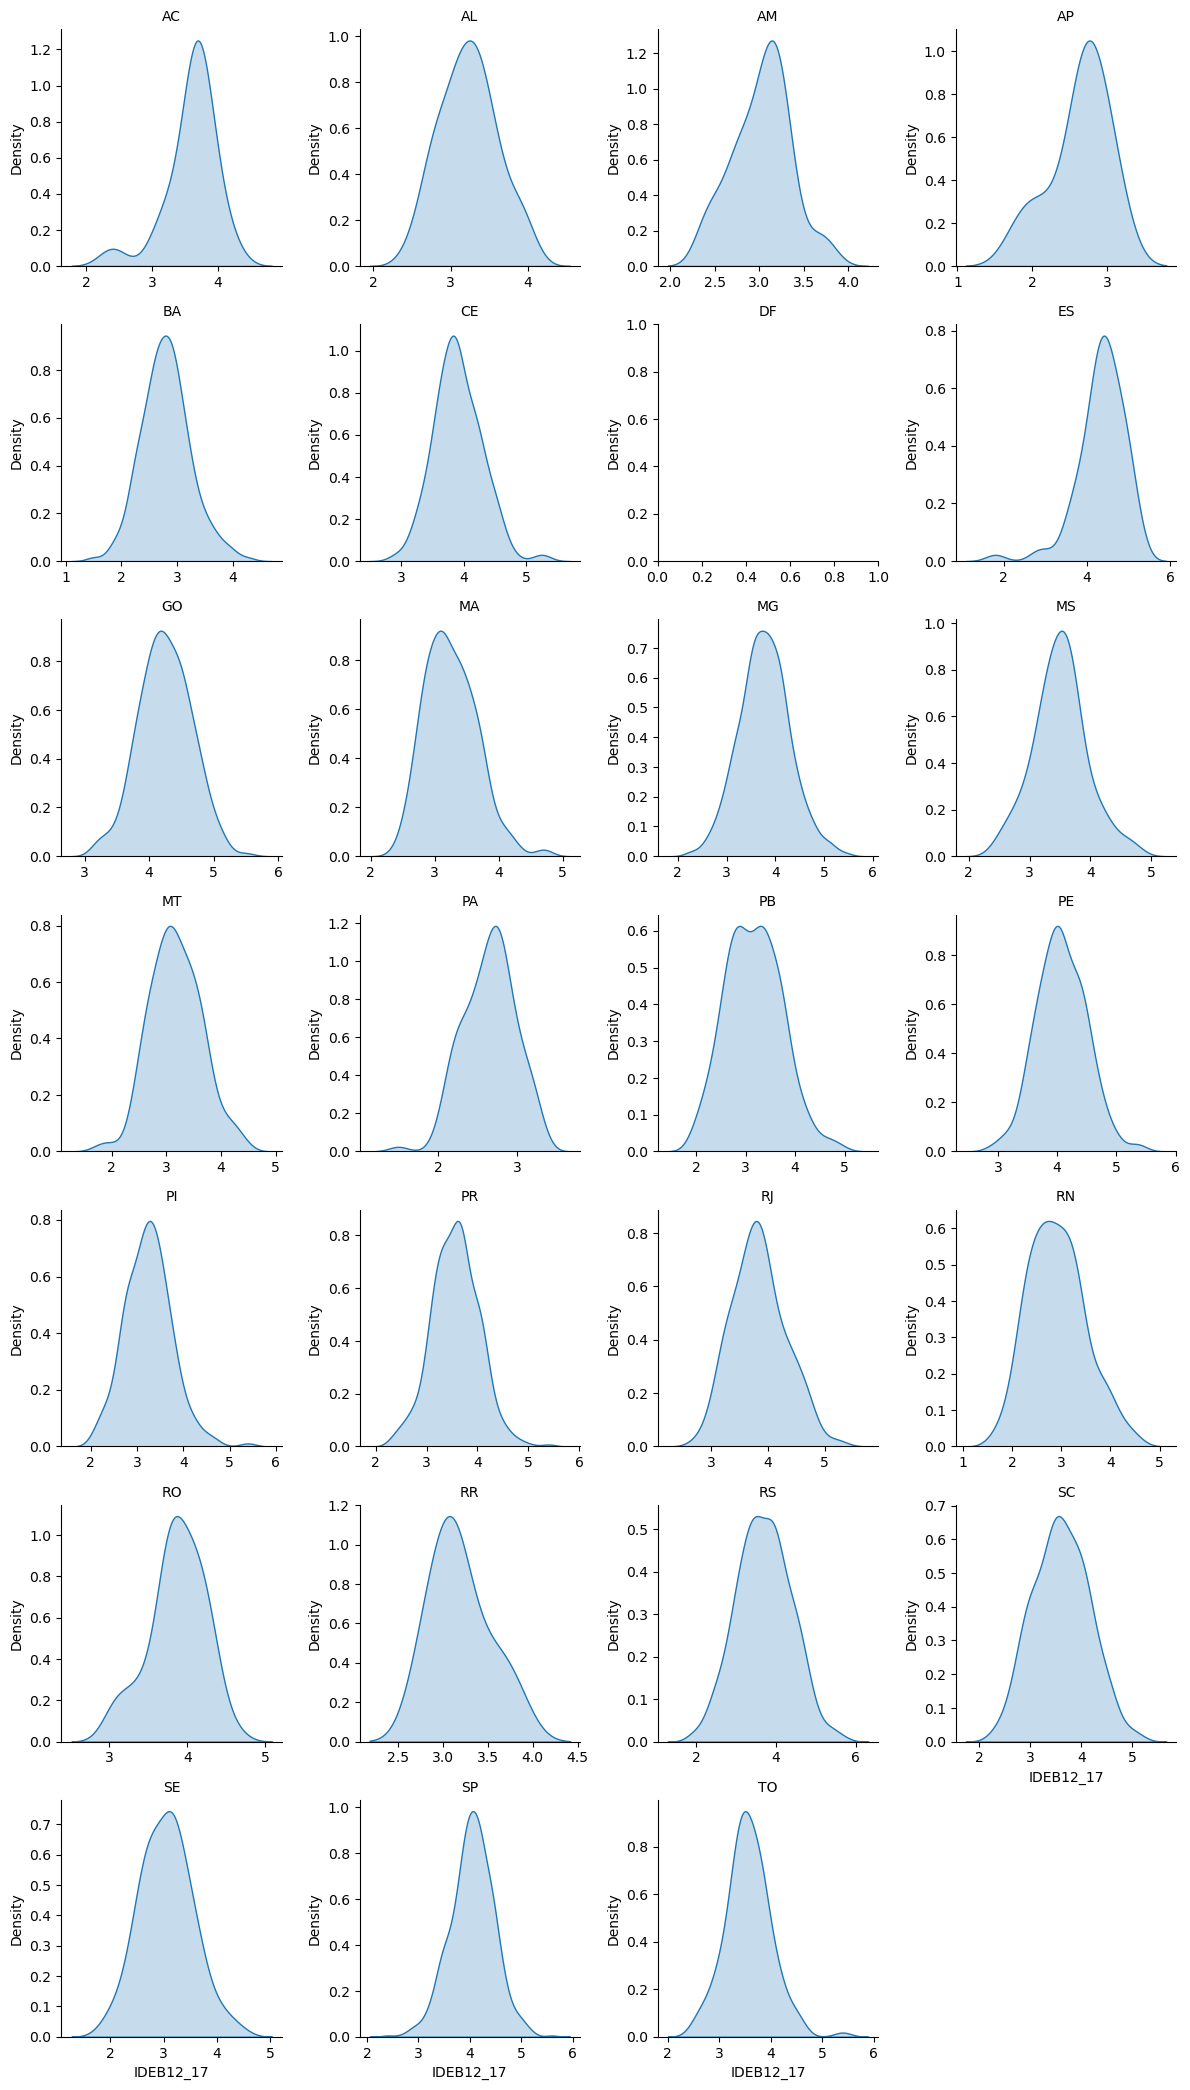

In [ ]:
g = sns.FacetGrid(df, col='SG_UF', col_wrap=4, sharex=False, sharey=False, height=3)
g.map(sns.kdeplot, 'IDEB12_17', fill=True)
g.set_titles("{col_name}")
plt.show()

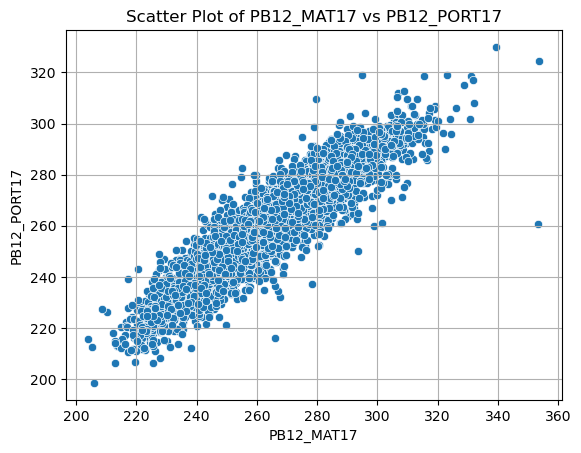

In [ ]:
sns.scatterplot(data=df, x='PB12_MAT17', y='PB12_PORT17')
plt.title('Scatter Plot of PB12_MAT17 vs PB12_PORT17')
plt.xlabel('PB12_MAT17')
plt.ylabel('PB12_PORT17')
plt.grid(True)
plt.show()

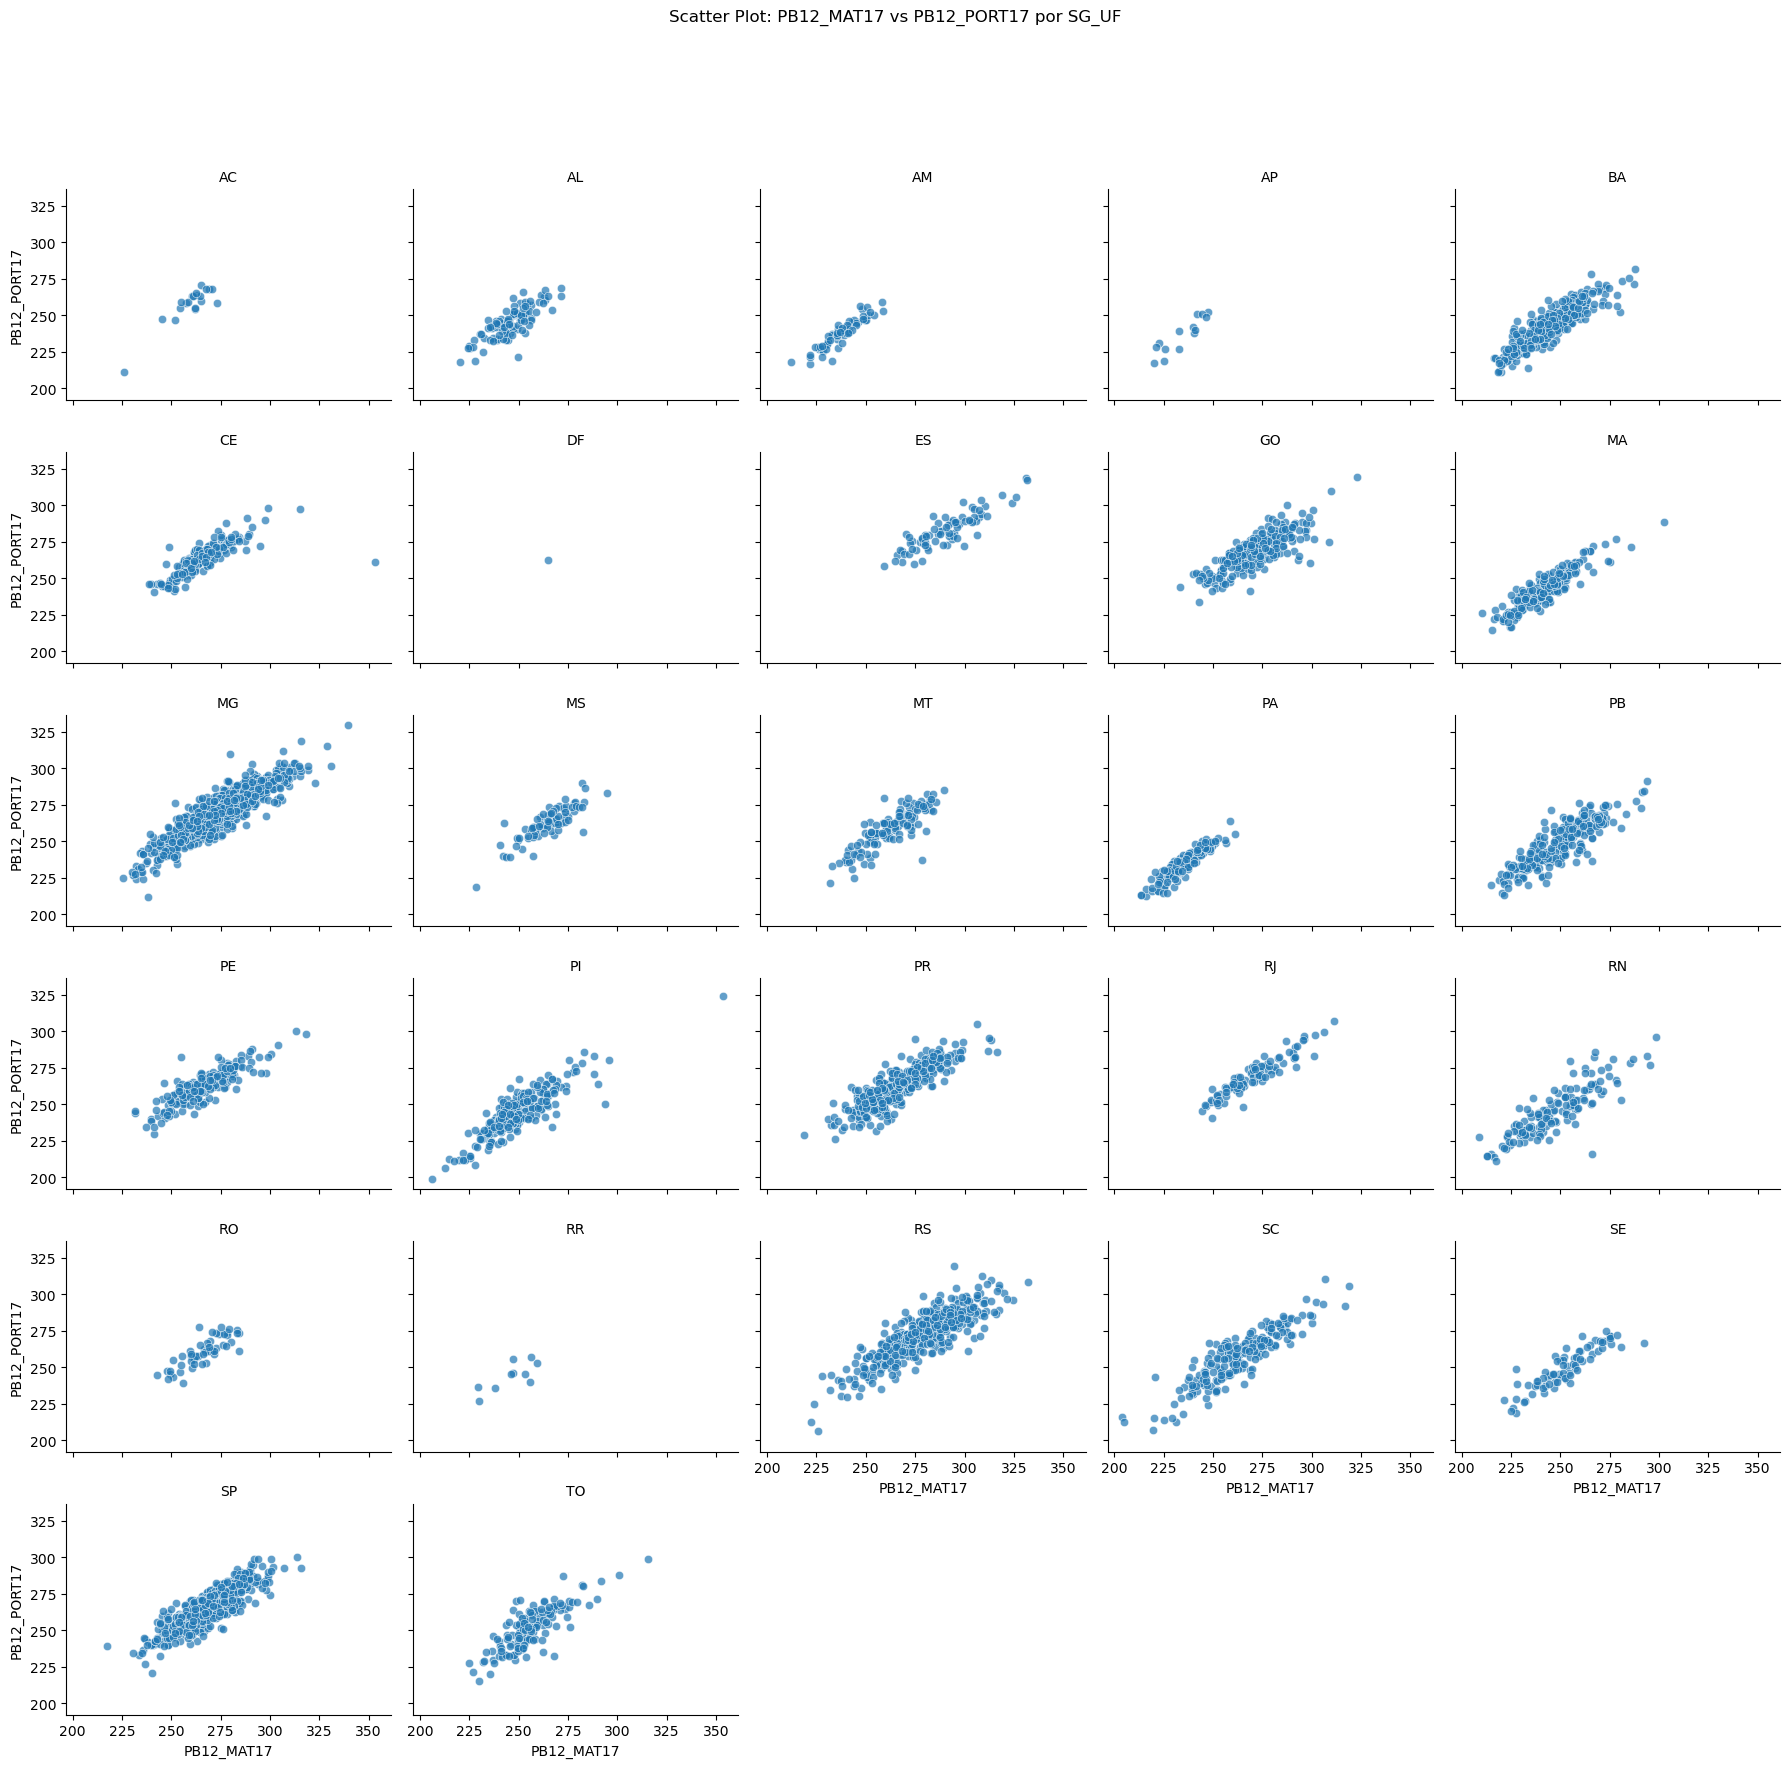

In [ ]:
g = sns.FacetGrid(df, col='SG_UF', col_wrap=5, height=3, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='PB12_MAT17', y='PB12_PORT17', alpha=0.7)
g.set_titles("{col_name}")
g.set_axis_labels("PB12_MAT17", "PB12_PORT17")
g.figure.suptitle('Scatter Plot: PB12_MAT17 vs PB12_PORT17 por SG_UF')
g.figure.subplots_adjust(top=0.88)
plt.show()

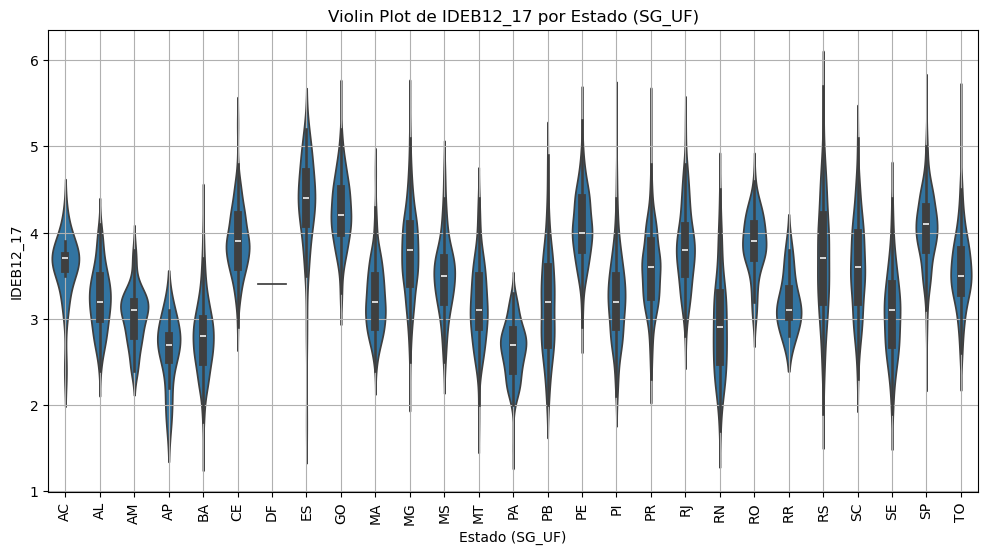

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='SG_UF', y='IDEB12_17', data=df)
plt.title('Violin Plot de IDEB12_17 por Estado (SG_UF)')
plt.xlabel('Estado (SG_UF)')
plt.ylabel('IDEB12_17')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## 1. Selecione duas variáveis categóricas e calcule as medidas de associação.
## 2. Selecione duas variáveis contínuas e calcule as medidas de covariância e correlação.

In [ ]:
# Definir os limites para os atributos
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# Criar a nova variável categórica
df['rendimento'] = pd.cut(df['IDEB12_17'], bins=[-float('inf'), q1, q3, float('inf')], labels=['rendimento baixo', 'rendimento médio', 'rendimento alto'])

# Exibir as primeiras linhas do dataframe para verificar a nova variável
df[['IDEB12_17', 'rendimento']].head(10)

# Tabela de contingência
contingency_table = pd.crosstab(df['SG_UF'], df['rendimento'])

# Qui-quadrado de independência
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Coeficiente de contingência
contingency_coefficient = np.sqrt(chi2 / (chi2 + n))

# Coeficiente Phi
phi_coefficient = np.sqrt(chi2 / n)

# V de Cramer
v_cramer = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Exibir os resultados
print("Tabela de Contingência:\n", contingency_table)
print("\nQui-quadrado: ", chi2)
print("p-valor: ", p)
print("Grau de liberdade: ", dof)
print("Valores esperados:\n", expected)
print("\nCoeficiente de Contingência: ", contingency_coefficient)
print("Coeficiente Phi: ", phi_coefficient)
print("V de Cramer: ", v_cramer)

Tabela de Contingência:
 rendimento  rendimento baixo  rendimento médio  rendimento alto
SG_UF                                                          
AC                         2                17                1
AL                        42                54                1
AM                        37                24                0
AP                        14                 0                0
BA                       334                76                2
CE                         2               123               59
DF                         0                 1                0
ES                         3                13               61
GO                         0                78              167
MA                        98               109                8
MG                        94               495              252
MS                        14                55                8
MT                        65                56                5
PA             

In [ ]:
# Calcule a covariância e as correlações de Pearson e Spearman para PB12_MAT17 e PB12_PORT17
# mat_port_df = df[['PB12_MAT17', 'PB12_PORT17']].dropna()

for df_uf in df['SG_UF']:
    mat_port_df = df_uf[['PB12_MAT17', 'PB12_PORT17']].dropna()
    cov = mat_port_df['PB12_MAT17'].cov(mat_port_df['PB12_PORT17'])
    pearson_corr = mat_port_df['PB12_MAT17'].corr(mat_port_df['PB12_PORT17'], method='pearson')
    spearman_corr = mat_port_df['PB12_MAT17'].corr(mat_port_df['PB12_PORT17'], method='spearman')

print('Covariância:', round(cov, 2))
print('Correlação de Pearson:', round(pearson_corr, 2))
print('Correlação de Spearman:', round(spearman_corr, 2))

Covariância: 337.03
Correlação de Pearson: 0.92
Correlação de Spearman: 0.92


In [ ]:
# Lista para armazenar os resultados
results = []

# Iterar sobre cada estado (SG_UF)
for uf in df['SG_UF'].cat.categories:
    # Filtrar os dados para o estado atual
    df_uf = df[df['SG_UF'] == uf]
    
    # Calcular a covariância e as correlações apenas se houver dados suficientes
    if len(df_uf) > 1:
        mat_port_df = df_uf[['PB12_MAT17', 'PB12_PORT17']].dropna()
        if not mat_port_df.empty:
            cov = mat_port_df['PB12_MAT17'].cov(mat_port_df['PB12_PORT17'])
            pearson_corr = mat_port_df['PB12_MAT17'].corr(mat_port_df['PB12_PORT17'], method='pearson')
            spearman_corr = mat_port_df['PB12_MAT17'].corr(mat_port_df['PB12_PORT17'], method='spearman')
            kendall_corr = mat_port_df['PB12_MAT17'].corr(mat_port_df['PB12_PORT17'], method='kendall')
            
            # Armazenar os resultados
            results.append((uf, cov, pearson_corr, spearman_corr, kendall_corr))

# Exibir os resultados
for result in results:
    print(f"Estado: {result[0]}")
    print(f"Covariância: {result[1]:.2f}")
    print(f"Correlação de Pearson: {result[2]:.2f}")
    print(f"Correlação de Spearman: {result[3]:.2f}")
    print(f"Correlação de Kendall: {result[4]:.2f}")
    print()

Estado: AC
Covariância: 118.67
Correlação de Pearson: 0.90
Correlação de Spearman: 0.75
Correlação de Kendall: 0.58

Estado: AL
Covariância: 90.58
Correlação de Pearson: 0.80
Correlação de Spearman: 0.78
Correlação de Kendall: 0.59

Estado: AM
Covariância: 90.64
Correlação de Pearson: 0.92
Correlação de Spearman: 0.93
Correlação de Kendall: 0.79

Estado: AP
Covariância: 105.95
Correlação de Pearson: 0.91
Correlação de Spearman: 0.89
Correlação de Kendall: 0.71

Estado: BA
Covariância: 143.09
Correlação de Pearson: 0.89
Correlação de Spearman: 0.89
Correlação de Kendall: 0.72

Estado: CE
Covariância: 110.30
Correlação de Pearson: 0.76
Correlação de Spearman: 0.86
Correlação de Kendall: 0.69

Estado: ES
Covariância: 177.34
Correlação de Pearson: 0.88
Correlação de Spearman: 0.85
Correlação de Kendall: 0.67

Estado: GO
Covariância: 145.52
Correlação de Pearson: 0.81
Correlação de Spearman: 0.80
Correlação de Kendall: 0.61

Estado: MA
Covariância: 141.40
Correlação de Pearson: 0.90
Correla

# Aula 6

## 1. Selecione duas variáveis contínuas no seu dataset e calcule os parâmetros de uma regressão simples utilizando o os métodos descritos nesta aula (OLS, MLE, Huber, Quantílico).
## 2. Selecione três variáveis contínuas, de preferência mantendo a mesma variável dependente do exercício anterior, e calcule os parâmetros de regressão utilizando os métodos de regressão multivariada apresentados;

### Cálculo Manual

Média de PB12_MAT17: 262.48322470632814
Média de PB12_PORT17: 259.2887476316787
Desvio padrão de PB12_MAT17: 20.027175711337986
Desvio padrão de PB12_PORT17: 18.27289449817031
Correlação entre PB12_MAT17 e PB12_PORT17: 0.9209735702134417
Y = 0.8403008555313243X + 38.72386934833031




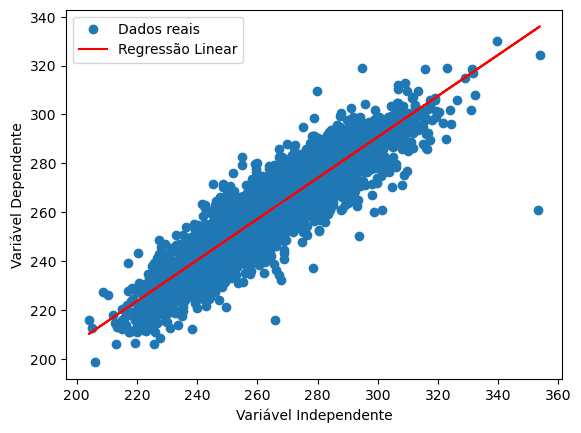

In [ ]:
# Armazena os valores de PB12_MAT17 e PB12_PORT17
x = df['PB12_MAT17'].dropna()
y = df['PB12_PORT17'].dropna()

# Adiciona intercepto
X = sm.add_constant(x)

# Calcular médias e desvios padrão
mean_X = np.mean(x)
mean_y = np.mean(y)

print(f"Média de PB12_MAT17: {mean_X}")
print(f"Média de PB12_PORT17: {mean_y}")

sd_X = np.std(x, ddof=1)
sd_y = np.std(y, ddof=1)

print(f"Desvio padrão de PB12_MAT17: {sd_X}")
print(f"Desvio padrão de PB12_PORT17: {sd_y}")

# Calcular correlação e coeficientes
correlation = np.corrcoef(x, y)[0, 1]

print(f"Correlação entre PB12_MAT17 e PB12_PORT17: {correlation}")

slope = (correlation * sd_y) / sd_X
intercept = mean_y - slope * mean_X

print(f"Y = {slope}X + {intercept}")
print("\n")

plt.scatter(x, y, label='Dados reais')
y_pred = (slope * x) + intercept
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

### Cálculo Manual invertendo as variáveis dependentes e independentes

Média de PB12_MAT17: 259.2887476316787
Média de PB12_PORT17: 262.48322470632814
Desvio padrão de PB12_MAT17: 18.27289449817031
Desvio padrão de PB12_PORT17: 20.027175711337986
Correlação entre PB12_MAT17 e PB12_PORT17: 0.9209735702134416
Y = 1.009391233447429X + 0.7594359153488313




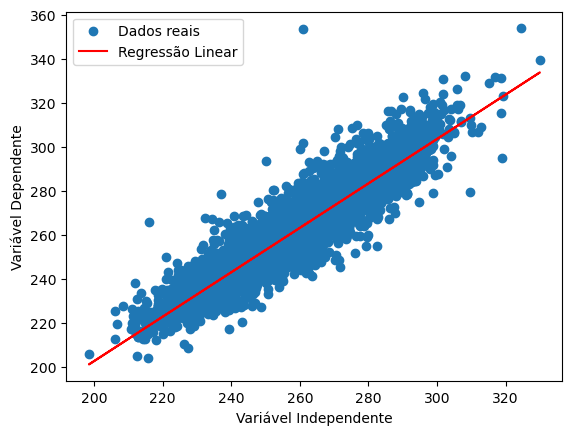

In [ ]:
# Armazena os valores de PB12_MAT17 e PB12_PORT17
y = df['PB12_MAT17'].dropna()
x = df['PB12_PORT17'].dropna()

# Adiciona intercepto
X = sm.add_constant(x)

# Calcular médias e desvios padrão
mean_X = np.mean(x)
mean_y = np.mean(y)

print(f"Média de PB12_MAT17: {mean_X}")
print(f"Média de PB12_PORT17: {mean_y}")

sd_X = np.std(x, ddof=1)
sd_y = np.std(y, ddof=1)

print(f"Desvio padrão de PB12_MAT17: {sd_X}")
print(f"Desvio padrão de PB12_PORT17: {sd_y}")

# Calcular correlação e coeficientes
correlation = np.corrcoef(x, y)[0, 1]

print(f"Correlação entre PB12_MAT17 e PB12_PORT17: {correlation}")

slope = (correlation * sd_y) / sd_X
intercept = mean_y - slope * mean_X

print(f"Y = {slope}X + {intercept}")
print("\n")

plt.scatter(x, y, label='Dados reais')
y_pred = (slope * x) + intercept
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

### Achados: as notas de português e matemática estão bem associadas. No geral, as notas de português tendem a ser maior que as de matemática, razão pela qual, ao se utilizar a reta produzida pela regressão linear, dada uma nota de português, a estimativa é uma nota menor para matemática, considerando a mesma padronização de notas em ambas as avaliações.

### Modelo OLS

                            OLS Regression Results                            
Dep. Variable:             PB12_MAT17   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 2.948e+04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:02:56   Log-Likelihood:                -18332.
No. Observations:                5278   AIC:                         3.667e+04
Df Residuals:                    5276   BIC:                         3.668e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7594      1.528      0.497      

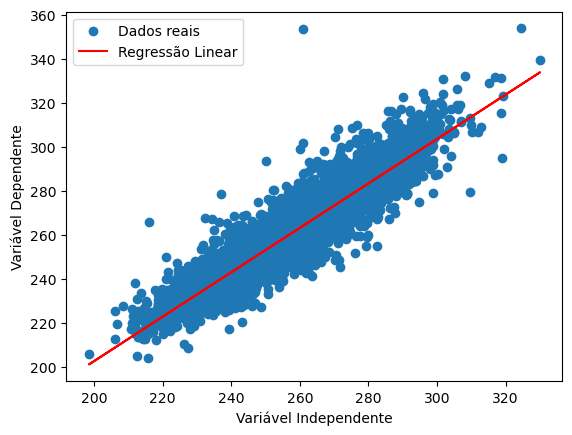

In [ ]:
# Estimação por OLS (que é MLE sob erro normal)
model = sm.OLS(y, X).fit()
print(model.summary())
print("\n")

# Fazer previsões
y_pred = model.predict(X)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

### Estimação por Máxima Verossimiliança (MLE)

Estimativas MLE:
beta0 = 0.7596527261440403
beta1 = 1.0093903886186266
sigma = 7.802350528684343


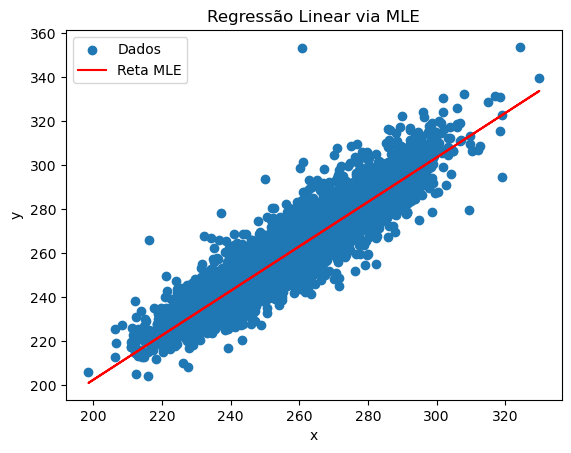

In [ ]:
import scipy.optimize as opt

# Definindo a função de log-verossimilhança negativa
# Usamos a parametrização: params = [beta0, beta1, log_sigma]
def neg_log_likelihood(params, x, y):
    beta0, beta1, log_sigma = params
    sigma = np.exp(log_sigma)  # Garante que sigma > 0
    n = len(y)
    residuals = y - (beta0 + beta1 * x)
    # Função de log-verossimilhança negativa:
    nll = 0.5 * n * np.log(2 * np.pi) + n * log_sigma + np.sum(residuals**2) / (2 * sigma**2)
    return nll

# Chute inicial para [beta0, beta1, log_sigma]
initial_guess = [0, 0, 0]

# Minimiza a log-verossimilhança negativa
result = opt.minimize(neg_log_likelihood, initial_guess, args=(x, y))

beta0_hat, beta1_hat, log_sigma_hat = result.x
sigma_hat = np.exp(log_sigma_hat)

print("Estimativas MLE:")
print("beta0 =", beta0_hat)
print("beta1 =", beta1_hat)
print("sigma =", sigma_hat)

# Visualização dos dados e da reta ajustada
plt.scatter(x, y, label='Dados')
plt.plot(x, beta0_hat + beta1_hat * x, color='red', label='Reta MLE')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regressão Linear via MLE")
plt.show()

### Métodos Robustos

### Regressão Quantílica

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.6364
Model:                       QuantReg   Bandwidth:                       1.935
Method:                 Least Squares   Sparsity:                        16.76
Date:                Mon, 24 Feb 2025   No. Observations:                 5278
Time:                        11:05:32   Df Residuals:                     5276
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5532      1.641     -0.947      0.344      -4.770       1.663
x              1.0164      0.006    161.017      0.000       1.004       1.029

The condition number is large, 3.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


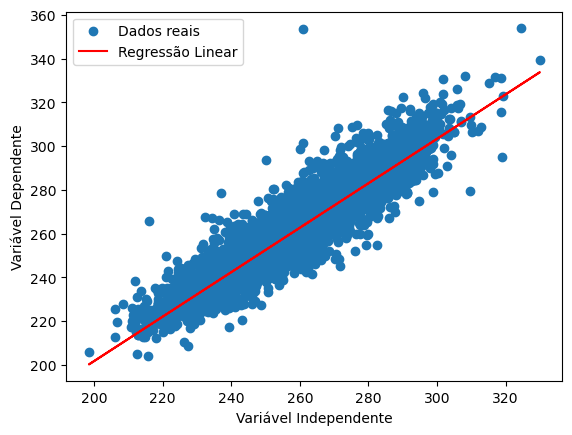

In [ ]:
import statsmodels.formula.api as smf

# Cria um DataFrame com os dados
df_slice = pd.DataFrame({'x': x, 'y': y})

# Ajusta a regressão quantílica para o quantil 0.5 (mediana)
quantile_model = smf.quantreg('y ~ x', df_slice).fit(q=0.5)
print(quantile_model.summary())

y_pred = quantile_model.predict(df_slice)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

### M-Estimadores de Huber

Coeficiente: [1.01084559]
Intercepto: -0.012817686045756605


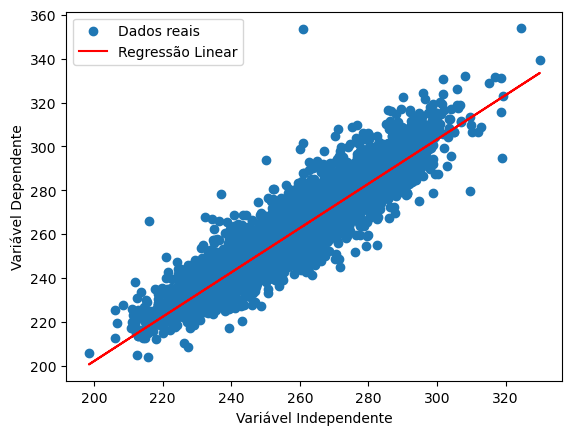

In [ ]:
from sklearn.linear_model import HuberRegressor
import numpy as np

# Regressão robusta usando Huber
huber = HuberRegressor(epsilon=1.35)
huber.fit(x.values.reshape(-1, 1), y)

# Fazer previsões
y_pred = huber.predict(x.values.reshape(-1, 1))

# Parâmetros estimados
print(f"Coeficiente: {huber.coef_}")
print(f"Intercepto: {huber.intercept_}")

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

### Método LAD (Least Absolute Deviation)

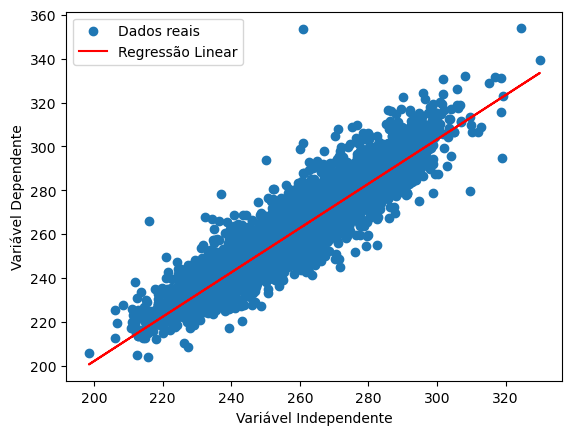

In [ ]:
from sklearn.linear_model import QuantileRegressor

# Regressão LAD (mediana)
lad = QuantileRegressor(quantile=0.5)
lad.fit(X, y)

# Previsões
y_pred_lad = lad.predict(X)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()


### Regressão linear multivariável

### OLS Multivariável

In [18]:
# Filter the DataFrame for relevant columns
df_filtered = df[['PB12_MAT17', 'PB12_PORT17', 'IDEB12_17']].dropna()

# Add an intercept
X = sm.add_constant(df_filtered[['PB12_MAT17', 'PB12_PORT17']])
y = df_filtered['IDEB12_17']

# Fit the OLS model
model_ideb = sm.OLS(y, X).fit()

print(model_ideb.summary())


                            OLS Regression Results                            
Dep. Variable:              IDEB12_17   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     4828.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:39:48   Log-Likelihood:                -2502.1
No. Observations:                5278   AIC:                             5010.
Df Residuals:                    5275   BIC:                             5030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.7112      0.076    -48.739      

C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\2213595232.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_grid = model_ideb.params[0] + model_ideb.params[1] * x_grid + model_ideb.params[2] * y_grid


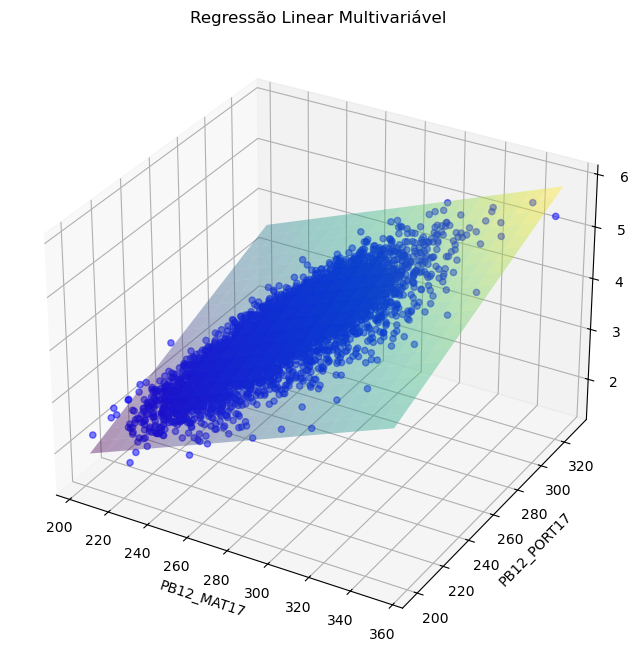

In [25]:
# predição
y_pred = model_ideb.predict(X)

# Visualizar resultados
plt.figure(figsize = (10, 8))
plot_axes = plt.axes(projection = '3d')

# Scatter plot dos dados reais
plot_axes.scatter3D(X['PB12_MAT17'], X['PB12_PORT17'], y, color = 'blue', alpha = 0.5)

# Criar um plano para representar o modelo de regressão
x_min, x_max = X['PB12_MAT17'].min(), X['PB12_MAT17'].max()
y_min, y_max = X['PB12_PORT17'].min(), X['PB12_PORT17'].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

# Calcular os valores preditos para cada ponto do grid
z_grid = model_ideb.params[0] + model_ideb.params[1] * x_grid + model_ideb.params[2] * y_grid

# Plotar a superfície
plot_axes.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, cmap='viridis')

plot_axes.set_xlabel('PB12_MAT17')
plot_axes.set_ylabel('PB12_PORT17')
plot_axes.set_zlabel('IDEB12_17')
plot_axes.set_title('Regressão Linear Multivariável')

plt.show()

### MLE Multivariável

MLE Estimates:
β₀ (Intercept): -3.710788
β₁ (PB12_MAT17): 0.015292
β₂ (PB12_PORT17): 0.012597
σ: 0.388726

Comparing with OLS estimates:
OLS Intercept: -3.711172
OLS PB12_MAT17: 0.015293
OLS PB12_PORT17: 0.012599
OLS σ: 0.388838


C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\2200774356.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\2200774356.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS PB12_MAT17: {model_ideb.params[1]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\2200774356.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by pos

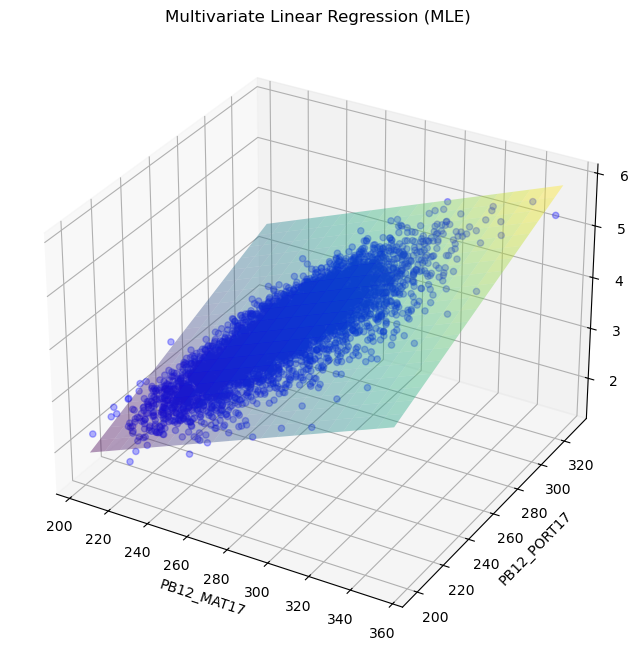

In [26]:
import numpy as np

import scipy.optimize as opt
import matplotlib.pyplot as plt

# Defining the function for negative log-likelihood
def neg_log_likelihood(params, X, y):
    """
    Calculate negative log-likelihood for multivariate linear regression
    
    Parameters:
    params: [beta0, beta1, beta2, log_sigma]
    X: design matrix with columns for const, PB12_MAT17 and PB12_PORT17
    y: dependent variable IDEB12_17
    
    Returns:
    Negative log-likelihood value
    """
    beta0, beta1, beta2, log_sigma = params
    sigma = np.exp(log_sigma)  # Ensures sigma > 0
    n = len(y)
    
    # Calculate predicted values
    y_pred = beta0 + beta1 * X[:,1] + beta2 * X[:,2]
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Calculate negative log-likelihood
    nll = 0.5 * n * np.log(2 * np.pi) + n * log_sigma + np.sum(residuals**2) / (2 * sigma**2)
    
    return nll

# Extract X and y from your data
X_array = X.to_numpy()
y_array = y.to_numpy()

# Initial parameter guess [beta0, beta1, beta2, log_sigma]
initial_guess = [0, 0, 0, 0]

# Minimize the negative log-likelihood
result = opt.minimize(neg_log_likelihood, initial_guess, args=(X_array, y_array))

# Extract optimized parameters
beta0_hat, beta1_hat, beta2_hat, log_sigma_hat = result.x
sigma_hat = np.exp(log_sigma_hat)

# Print results
print("MLE Estimates:")
print(f"β₀ (Intercept): {beta0_hat:.6f}")
print(f"β₁ (PB12_MAT17): {beta1_hat:.6f}")
print(f"β₂ (PB12_PORT17): {beta2_hat:.6f}")
print(f"σ: {sigma_hat:.6f}")

# Compare with OLS results
print("\nComparing with OLS estimates:")
print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
print(f"OLS PB12_MAT17: {model_ideb.params[1]:.6f}")
print(f"OLS PB12_PORT17: {model_ideb.params[2]:.6f}")
print(f"OLS σ: {model_ideb.scale**.5:.6f}")

# Create a 3D visualization
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Scatter plot of actual data
ax.scatter(X_array[:, 1], X_array[:, 2], y_array, color='blue', alpha=0.3)

# Create meshgrid for predicted surface
x_min, x_max = X_array[:, 1].min(), X_array[:, 1].max()
y_min, y_max = X_array[:, 2].min(), X_array[:, 2].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))
z_grid = beta0_hat + beta1_hat * x_grid + beta2_hat * y_grid

# Plot the predicted surface
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, cmap='viridis')

ax.set_xlabel('PB12_MAT17')
ax.set_ylabel('PB12_PORT17')
ax.set_zlabel('IDEB12_17')
ax.set_title('Multivariate Linear Regression (MLE)')

plt.show()

### M-estimador de Huber Multivariável

Huber Regression Results:
Intercept: -3.829232
PB12_MAT17 coefficient: 0.015361
PB12_PORT17 coefficient: 0.013106

Comparing with OLS estimates:
OLS Intercept: -3.711172
OLS PB12_MAT17: 0.015293
OLS PB12_PORT17: 0.012599
OLS σ (error standard deviation): 0.388838

Comparing with MLE estimates:
MLE Intercept: -3.710788
MLE PB12_MAT17: 0.015292
MLE PB12_PORT17: 0.012597
MLE σ: 0.388726


C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\1877126602.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\1877126602.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"OLS PB12_MAT17: {model_ideb.params[1]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\1877126602.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by pos

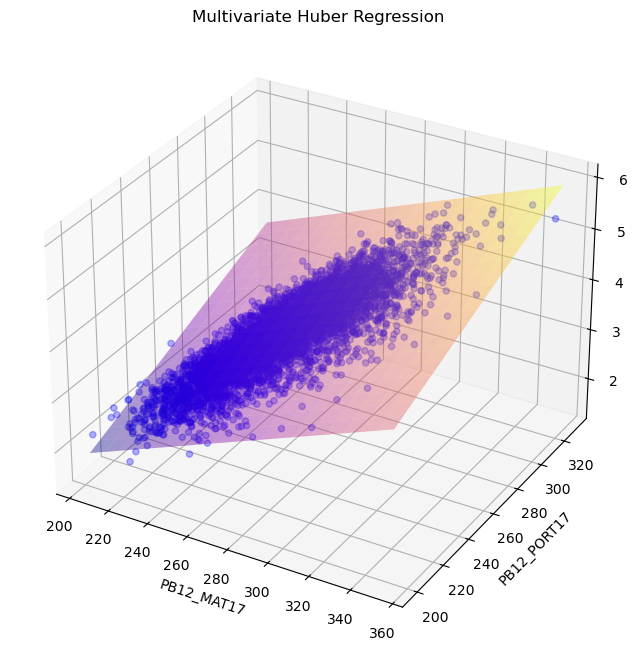

In [30]:
from sklearn.linear_model import HuberRegressor

# Extract features and target
X_features = df_filtered[['PB12_MAT17', 'PB12_PORT17']].values
y_huber = df_filtered['IDEB12_17'].values

# Initialize and fit the Huber regressor
huber_regressor = HuberRegressor(epsilon=1.35)  # Default epsilon value
huber_regressor.fit(X_features, y_huber)

# Extract coefficients and intercept
intercept_huber = huber_regressor.intercept_
coef_huber = huber_regressor.coef_

print("Huber Regression Results:")
print(f"Intercept: {intercept_huber:.6f}")
print(f"PB12_MAT17 coefficient: {coef_huber[0]:.6f}")
print(f"PB12_PORT17 coefficient: {coef_huber[1]:.6f}")

# Compare with OLS and MLE results
print("\nComparing with OLS estimates:")
print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
print(f"OLS PB12_MAT17: {model_ideb.params[1]:.6f}")
print(f"OLS PB12_PORT17: {model_ideb.params[2]:.6f}")
print(f"OLS σ (error standard deviation): {model_ideb.scale**.5:.6f}")

print("\nComparing with MLE estimates:")
print(f"MLE Intercept: {beta0_hat:.6f}")
print(f"MLE PB12_MAT17: {beta1_hat:.6f}")
print(f"MLE PB12_PORT17: {beta2_hat:.6f}")
print(f"MLE σ: {sigma_hat:.6f}")

# Create a 3D visualization
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Scatter plot of actual data
ax.scatter(X_features[:, 0], X_features[:, 1], y_huber, color='blue', alpha=0.3)

# Create meshgrid for predicted surface
x_min, x_max = X_features[:, 0].min(), X_features[:, 0].max()
y_min, y_max = X_features[:, 1].min(), X_features[:, 1].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

# Calculate the predicted values using the Huber model
z_grid_huber = intercept_huber + coef_huber[0] * x_grid + coef_huber[1] * y_grid

# Plot the predicted surface
ax.plot_surface(x_grid, y_grid, z_grid_huber, alpha=0.4, cmap='plasma')

ax.set_xlabel('PB12_MAT17')
ax.set_ylabel('PB12_PORT17')
ax.set_zlabel('IDEB12_17')
ax.set_title('Multivariate Huber Regression')

plt.show()

### Comparação entre os modelos

C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\477983530.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(residuals, labels=model_names)
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\477983530.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'OLS': [model_ideb.params[0], model_ideb.params[1], model_ideb.params[2]],
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\477983530.py:95: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefs[f'Quantile {

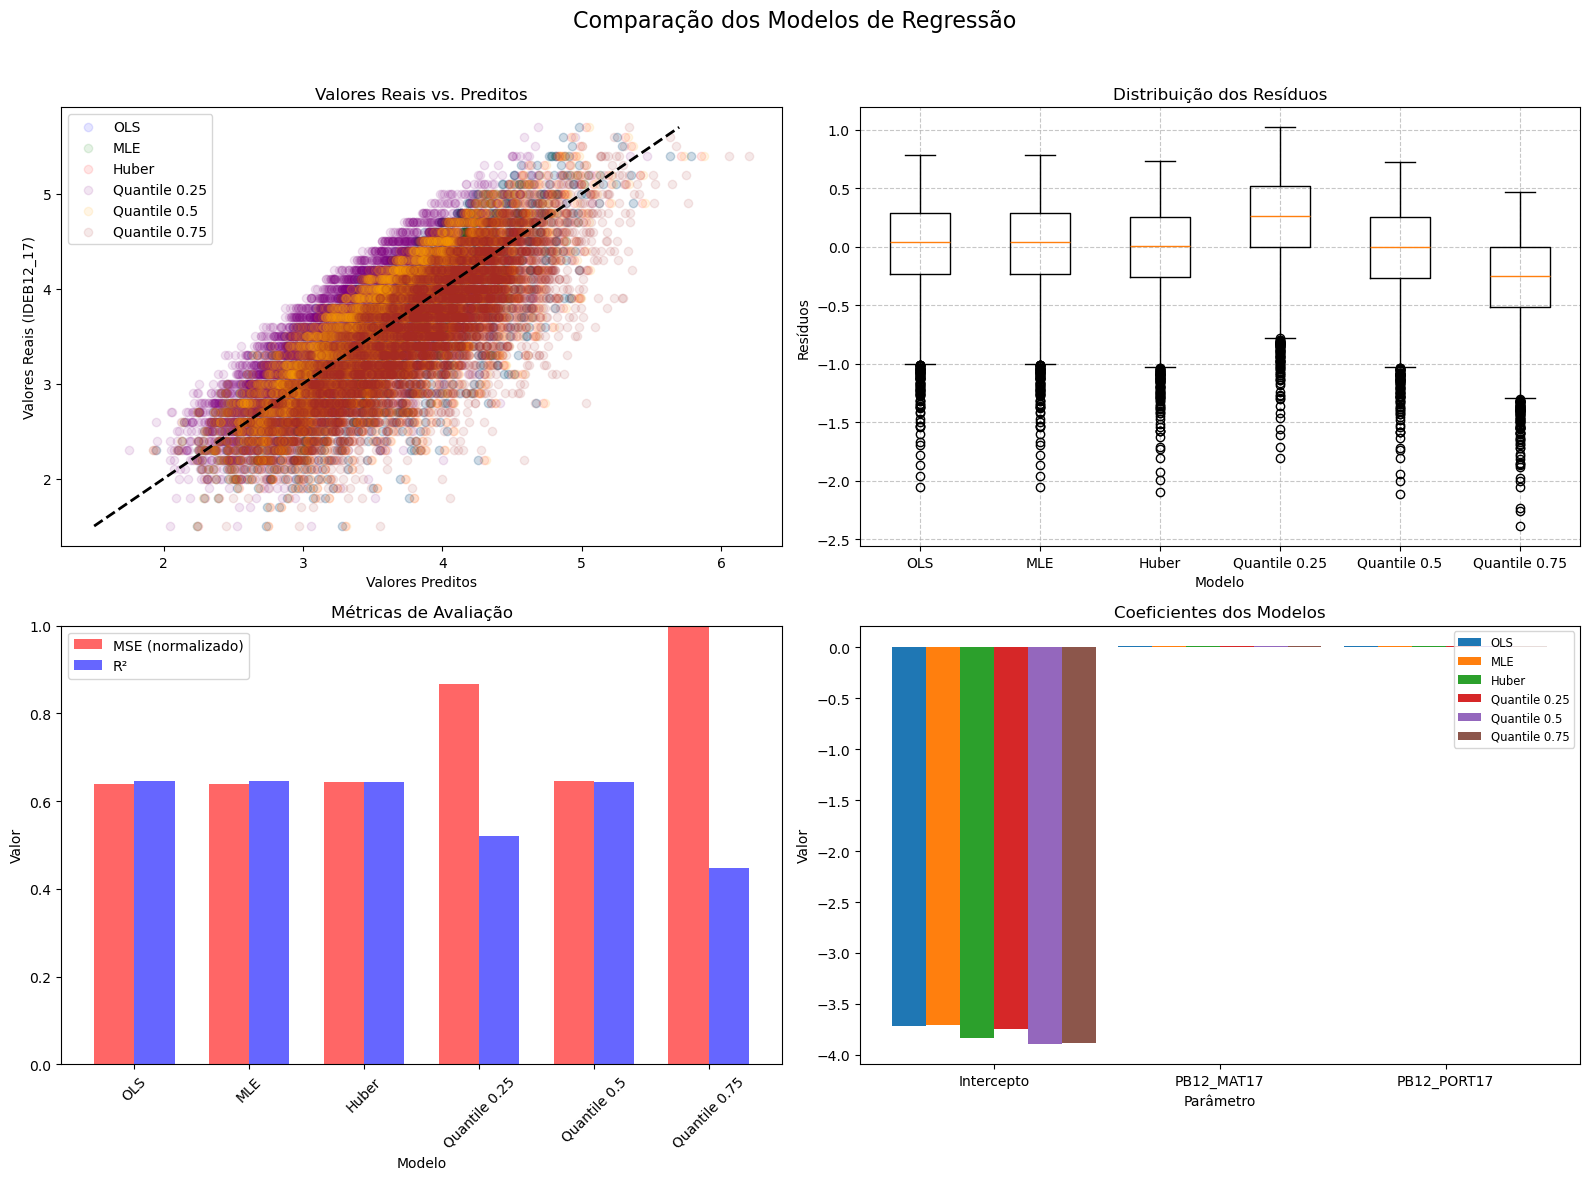


Tabela de Métricas:
                  MSE      R²
OLS            0.1511  0.6467
MLE            0.1511  0.6467
Huber          0.1522  0.6441
Quantile 0.25  0.2052  0.5202
Quantile 0.5   0.1526  0.6432
Quantile 0.75  0.2365  0.4470


In [31]:
# Create a figure to compare all regression models
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparação dos Modelos de Regressão', fontsize=16)

# Get predictions from all models
predictions = {
    'OLS': model_ideb.predict(X),
    'MLE': beta0_hat + beta1_hat * X_features[:, 0] + beta2_hat * X_features[:, 1],
    'Huber': intercept_huber + coef_huber[0] * X_features[:, 0] + coef_huber[1] * X_features[:, 1],
}

# Add quantile regression predictions
for q in quantiles:
    model = results[q]
    predictions[f'Quantile {q}'] = model.predict(df_filtered[['PB12_MAT17', 'PB12_PORT17']])

# Calculate metrics (MSE and R^2) for each model
metrics = {}
for name, pred in predictions.items():
    # Calculate Mean Squared Error
    mse = ((y - pred) ** 2).mean()
    
    # Calculate R-squared
    ss_total = ((y - y.mean()) ** 2).sum()
    ss_residual = ((y - pred) ** 2).sum()
    r2 = 1 - (ss_residual / ss_total)
    
    metrics[name] = {'MSE': mse, 'R²': r2}

# 1. Actual vs Predicted plot for each model
axs[0, 0].set_title('Valores Reais vs. Preditos')
axs[0, 0].set_xlabel('Valores Preditos')
axs[0, 0].set_ylabel('Valores Reais (IDEB12_17)')

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
for (name, pred), color in zip(predictions.items(), colors):
    axs[0, 0].scatter(pred, y, alpha=0.1, label=f'{name}', color=color)

axs[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axs[0, 0].legend()

# 2. Residuals plot for each model
axs[0, 1].set_title('Distribuição dos Resíduos')
axs[0, 1].set_xlabel('Modelo')
axs[0, 1].set_ylabel('Resíduos')

# Create boxplots of residuals
residuals = []
model_names = []
for name, pred in predictions.items():
    residuals.append(y - pred)
    model_names.append(name)

axs[0, 1].boxplot(residuals, labels=model_names)
axs[0, 1].grid(True, linestyle='--', alpha=0.7)

# 3. Metrics comparison
axs[1, 0].set_title('Métricas de Avaliação')
axs[1, 0].set_xlabel('Modelo')
axs[1, 0].set_ylabel('Valor')
axs[1, 0].set_ylim(0, 1)

x_pos = np.arange(len(metrics))
width = 0.35

# Plot MSE
mse_values = [metrics[name]['MSE'] for name in metrics.keys()]
r2_values = [metrics[name]['R²'] for name in metrics.keys()]

# Normalize MSE for better visualization
max_mse = max(mse_values)
mse_normalized = [mse/max_mse for mse in mse_values]

axs[1, 0].bar(x_pos - width/2, mse_normalized, width, label='MSE (normalizado)', color='red', alpha=0.6)
axs[1, 0].bar(x_pos + width/2, r2_values, width, label='R²', color='blue', alpha=0.6)
axs[1, 0].set_xticks(x_pos)
axs[1, 0].set_xticklabels(metrics.keys(), rotation=45)
axs[1, 0].legend()

# 4. Coefficients comparison
axs[1, 1].set_title('Coeficientes dos Modelos')
axs[1, 1].set_xlabel('Parâmetro')
axs[1, 1].set_ylabel('Valor')

# Organize coefficients
coefs = {
    'OLS': [model_ideb.params[0], model_ideb.params[1], model_ideb.params[2]],
    'MLE': [beta0_hat, beta1_hat, beta2_hat],
    'Huber': [intercept_huber, coef_huber[0], coef_huber[1]]
}

# Add quantile regression coefficients
for q in quantiles:
    model = results[q]
    coefs[f'Quantile {q}'] = [model.params[0], model.params[1], model.params[2]]

param_names = ['Intercepto', 'PB12_MAT17', 'PB12_PORT17']
x_pos = np.arange(len(param_names))
width = 0.15  # Narrower bars for multiple models
offset = -width * (len(coefs) - 1) / 2  # Center the groups of bars

for i, (name, coeffs) in enumerate(coefs.items()):
    axs[1, 1].bar(x_pos + offset + i * width, coeffs, width, label=name)

axs[1, 1].set_xticks(x_pos)
axs[1, 1].set_xticklabels(param_names)
axs[1, 1].legend(loc='upper right', fontsize='small')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print a summary table of metrics
print("\nTabela de Métricas:")
metrics_df = pd.DataFrame(metrics).T
print(metrics_df.round(4))

# Comparação entre os Modelos de Regressão

## Desempenho dos Modelos
Analisando os resultados dos diferentes modelos de regressão aplicados, observamos padrões importantes:

- **OLS e MLE** apresentaram desempenho praticamente idêntico, com os melhores coeficientes de determinação (R² ≈ 0,647) e os menores erros quadráticos médios (MSE ≈ 0,151). Isso era esperado, já que sob pressupostos de normalidade, estes métodos são equivalentes.

- **Regressão Robusta de Huber** mostrou desempenho muito próximo aos métodos tradicionais (R² ≈ 0,644), indicando que os outliers não afetaram significativamente os resultados do modelo.

- **Regressões Quantílicas** apresentaram variabilidade conforme o quantil escolhido:
    * O modelo mediano (q=0,5) teve desempenho similar aos modelos OLS/MLE (R² ≈ 0,643)
    * O modelo para o primeiro quartil (q=0,25) teve desempenho inferior (R² ≈ 0,52)
    * O modelo para o terceiro quartil (q=0,75) mostrou o pior desempenho (R² ≈ 0,447)

## Interpretação dos Coeficientes
Os coeficientes estimados foram relativamente consistentes entre os modelos OLS, MLE e Huber. A maior variabilidade foi observada nas regressões quantílicas, especialmente no quantil 0,75, sugerindo que a relação entre as variáveis preditoras (notas de matemática e português) e a variável resposta (IDEB) pode ser diferente para escolas com desempenho superior.

## Conclusão
Para este conjunto de dados, os modelos tradicionais (OLS/MLE) ofereceram o melhor equilíbrio entre simplicidade e poder preditivo. A similaridade com o modelo de Huber sugere robustez nos dados, com poucos outliers influentes. As regressões quantílicas revelam que a relação entre as variáveis pode não ser uniforme em todos os níveis de desempenho, o que poderia justificar abordagens específicas para diferentes faixas de desempenho escolar.

### Regressão Quantílica Multivariável

Quantile 0.25
Intercept: -3.741424
PB12_MAT17: 0.014059
PB12_PORT17: 0.013070
------------------------
Quantile 0.5
Intercept: -3.895833
PB12_MAT17: 0.015473
PB12_PORT17: 0.013266
------------------------
Quantile 0.75
Intercept: -3.884639
PB12_MAT17: 0.015612
PB12_PORT17: 0.014065
------------------------

Comparing with OLS estimates:
OLS Intercept: -3.711172
OLS PB12_MAT17: 0.015293
OLS PB12_PORT17: 0.012599


C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\162465636.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Intercept: {results[q].params[0]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\162465636.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"PB12_MAT17: {results[q].params[1]:.6f}")
C:\Users\joao-b.neto\AppData\Local\Temp\ipykernel_24212\162465636.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

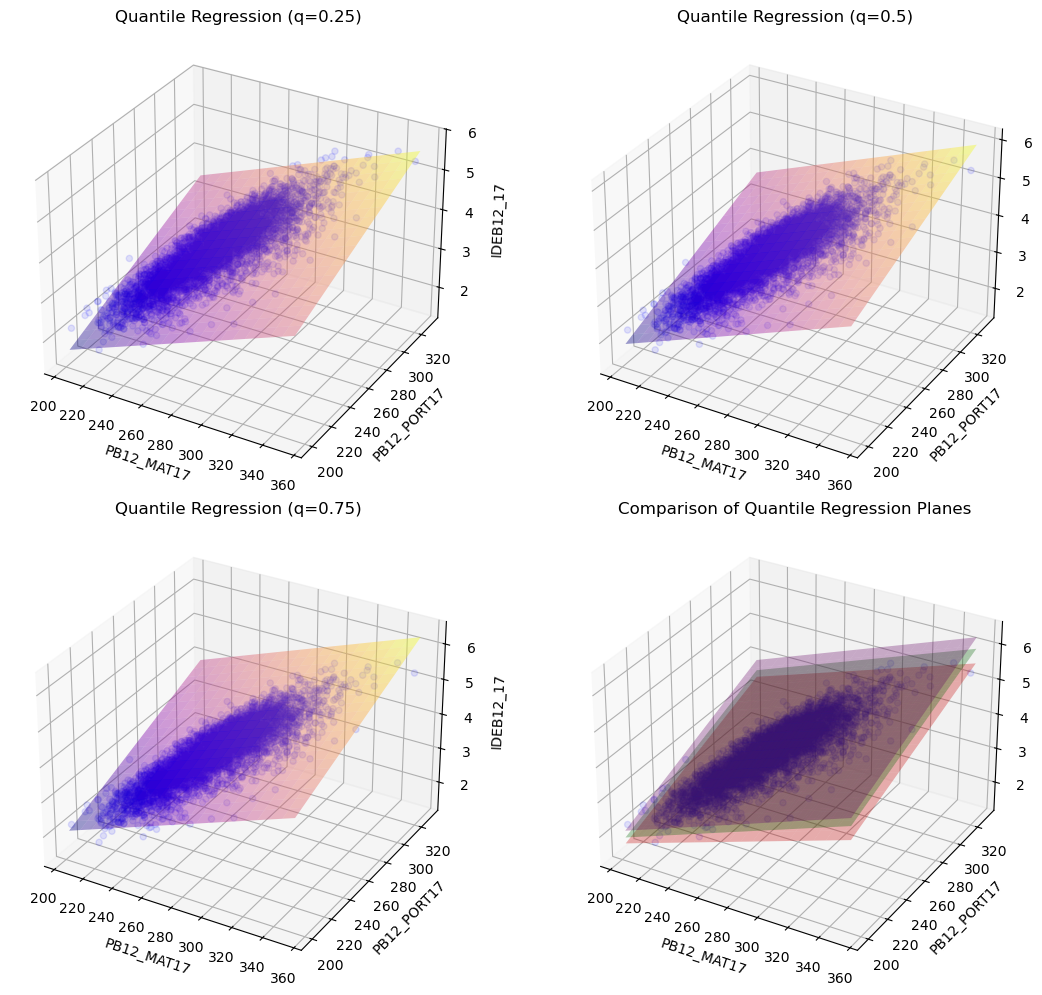

In [ ]:
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the quantiles to fit
quantiles = [0.25, 0.5, 0.75]
results = {}

# Fit quantile regression models
for q in quantiles:
    # Use formula interface for ease of specification
    model = smf.quantreg('IDEB12_17 ~ PB12_MAT17 + PB12_PORT17', data=df_filtered)
    results[q] = model.fit(q=q)
    print(f"Quantile {q}")
    print(f"Intercept: {results[q].params[0]:.6f}")
    print(f"PB12_MAT17: {results[q].params[1]:.6f}")
    print(f"PB12_PORT17: {results[q].params[2]:.6f}")
    print("------------------------")

# Compare with OLS results
print("\nComparing with OLS estimates:")
print(f"OLS Intercept: {model_ideb.params[0]:.6f}")
print(f"OLS PB12_MAT17: {model_ideb.params[1]:.6f}")
print(f"OLS PB12_PORT17: {model_ideb.params[2]:.6f}")

# Create a figure for 3D visualization
fig = plt.figure(figsize=(12, 10))

# Create a meshgrid for visualizing the regression surfaces
x_min, x_max = df_filtered['PB12_MAT17'].min(), df_filtered['PB12_MAT17'].max()
y_min, y_max = df_filtered['PB12_PORT17'].min(), df_filtered['PB12_PORT17'].max()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 20), np.linspace(y_min, y_max, 20))

# Create subplots for each quantile
for i, q in enumerate(quantiles):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    
    # Scatter plot of actual data
    ax.scatter(df_filtered['PB12_MAT17'], df_filtered['PB12_PORT17'], df_filtered['IDEB12_17'], 
              color='blue', alpha=0.1)
    
    # Calculate the predicted values using the quantile model
    z_grid = (results[q].params[0] + 
              results[q].params[1] * x_grid + 
              results[q].params[2] * y_grid)
    
    # Plot the predicted surface
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.4, cmap='plasma')
    
    ax.set_xlabel('PB12_MAT17')
    ax.set_ylabel('PB12_PORT17')
    ax.set_zlabel('IDEB12_17')
    ax.set_title(f'Quantile Regression (q={q})')

# Create a subplot for comparing all quantiles
ax = fig.add_subplot(2, 2, 4, projection='3d')

# Scatter plot of actual data
ax.scatter(df_filtered['PB12_MAT17'], df_filtered['PB12_PORT17'], df_filtered['IDEB12_17'], 
          color='blue', alpha=0.1)

# Plot surfaces for different quantiles with different colors
colors = ['red', 'green', 'purple']
for i, q in enumerate(quantiles):
    z_grid = (results[q].params[0] + 
              results[q].params[1] * x_grid + 
              results[q].params[2] * y_grid)
    
    ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.3, color=colors[i])

ax.set_xlabel('PB12_MAT17')
ax.set_ylabel('PB12_PORT17')
ax.set_zlabel('IDEB12_17')
ax.set_title('Comparison of Quantile Regression Planes')

plt.tight_layout()
plt.show()

### Séries temporais